In [ ]:
import pandas as pd 
import numpy as np
from math import ceil

import matplotlib.pyplot as plt
import seaborn as sns
import os

## Import datetime object for date columns in dataset
from datetime import datetime

## Setting seaborn style
sns.set()

## Import train_test_split to split data for model training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_data = pd.read_csv("train_data.csv", low_memory=False)
test_data = pd.read_csv("test_data.csv")

<hr>

# 2. Data Exploration

In [ ]:
train_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [ ]:
test_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5


In [ ]:
print(f"The shape of our Training Dataset is: {train_data.shape}")
print(f"The shape of our Training Dataset is: {test_data.shape}")

The shape of our Training Dataset is: (593471, 33)
The shape of our Training Dataset is: (387975, 30)


Train data has 3 more variables than test data. We can see below which feature are train, but not in test.

In [ ]:
print(f"The features of our Test Dataset is: {test_data.columns.values}")
print("------------------------------------------------------------------")
print(f"The features of our Test Dataset is: {train_data.columns.values}")

The features of our Test Dataset is: ['Accident Date' 'Age at Injury' 'Alternative Dispute Resolution'
 'Assembly Date' 'Attorney/Representative' 'Average Weekly Wage'
 'Birth Year' 'C-2 Date' 'C-3 Date' 'Carrier Name' 'Carrier Type'
 'Claim Identifier' 'County of Injury' 'COVID-19 Indicator'
 'District Name' 'First Hearing Date' 'Gender' 'IME-4 Count'
 'Industry Code' 'Industry Code Description' 'Medical Fee Region'
 'OIICS Nature of Injury Description' 'WCIO Cause of Injury Code'
 'WCIO Cause of Injury Description' 'WCIO Nature of Injury Code'
 'WCIO Nature of Injury Description' 'WCIO Part Of Body Code'
 'WCIO Part Of Body Description' 'Zip Code' 'Number of Dependents']
------------------------------------------------------------------
The features of our Test Dataset is: ['Accident Date' 'Age at Injury' 'Alternative Dispute Resolution'
 'Assembly Date' 'Attorney/Representative' 'Average Weekly Wage'
 'Birth Year' 'C-2 Date' 'C-3 Date' 'Carrier Name' 'Carrier Type'
 'Claim Identifie

In the Test dataset there is not variables such as: Claim Injury Type , Agreement Reached(reasonable because it is target variable) and WCB Decision.

In [ ]:
# Set "Claim Identifier" as the index for the train and test datasets
train_data = train_data.set_index("Claim Identifier")
test_data = test_data.set_index("Claim Identifier")

In [ ]:
# train_data.describe(include="all").T

### 2.2. Checking incoherencies in the data. 

In [ ]:
train_data.info()

## DATA TYPES:
# Convert accident date (to date type)
# convert age (to int)
# Alternative dispute resolution (??)
# Assembly date (to date type)
# birth year (to int)
# C2 date (to date type)
# C3 date (to date type)
# First hearing date (to date)
# IME-4 count (to int)
# Industry code (object)
# OIICS Nature of Injury Description (to object) 
# WCIO cause of injury code (float to object)
# WCIO Nature of Injury Code (float to object)
# WCIO Part Of Body Code (float to object)
# Agreement reached (??) - boolean/ int(???)
# Number of dependents (to int)

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387975 entries, 6165911 to 6553594
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       385531 non-null  object 
 1   Age at Injury                       387975 non-null  int64  
 2   Alternative Dispute Resolution      387975 non-null  object 
 3   Assembly Date                       387975 non-null  object 
 4   Attorney/Representative             387975 non-null  object 
 5   Average Weekly Wage                 368771 non-null  float64
 6   Birth Year                          368505 non-null  float64
 7   C-2 Date                            378841 non-null  object 
 8   C-3 Date                            85216 non-null   object 
 9   Carrier Name                        387975 non-null  object 
 10  Carrier Type                        387975 non-null  object 
 11  County of Injury        

#### 2.2.1 Changing the data types

In [ ]:
train_data["Agreement Reached"].unique()

array([ 0.,  1., nan])

In [ ]:
train_data["Age at Injury"] = train_data["Age at Injury"].astype("Int64")
test_data["Age at Injury"] = test_data["Age at Injury"].astype("Int64")

train_data["Number of Dependents"] = train_data["Number of Dependents"].astype("Int64")
test_data["Number of Dependents"] = test_data["Number of Dependents"].astype("Int64")

train_data["Birth Year"] = train_data["Birth Year"].astype("Int64")
test_data["Birth Year"] = test_data["Birth Year"].astype("Int64")

train_data["WCIO Part Of Body Code"] = train_data["WCIO Part Of Body Code"].astype("Int64")
test_data["WCIO Part Of Body Code"] = test_data["WCIO Part Of Body Code"].astype("Int64")

train_data["WCIO Nature of Injury Code"] = train_data["WCIO Nature of Injury Code"].astype("Int64")
test_data["WCIO Nature of Injury Code"] = test_data["WCIO Nature of Injury Code"].astype("Int64")

train_data["WCIO Cause of Injury Code"] = train_data["WCIO Cause of Injury Code"].astype("Int64")
test_data["WCIO Cause of Injury Code"] = test_data["WCIO Cause of Injury Code"].astype("Int64")

train_data["Industry Code"] = train_data["Industry Code"].astype("Int64")
test_data["Industry Code"] = test_data["Industry Code"].astype("Int64")

train_data["Agreement Reached"] = train_data["Agreement Reached"].astype("Int64")

train_data["Accident Date"] = pd.to_datetime(train_data['Accident Date'])
test_data["Accident Date"] = pd.to_datetime(test_data['Accident Date'])

train_data["Assembly Date"] = pd.to_datetime(train_data['Assembly Date'])
test_data["Assembly Date"] = pd.to_datetime(test_data['Assembly Date'])

train_data["C-2 Date"] = pd.to_datetime(train_data['C-2 Date'])
test_data["C-2 Date"] = pd.to_datetime(test_data['C-2 Date'])

train_data["C-3 Date"] = pd.to_datetime(train_data['C-3 Date'])
test_data["C-3 Date"] = pd.to_datetime(test_data['C-3 Date'])

train_data["First Hearing Date"] = pd.to_datetime(train_data['First Hearing Date'])
test_data["First Hearing Date"] = pd.to_datetime(test_data['First Hearing Date'])

#### 2.2.2 Checking Duplicates

In [ ]:
# Filter duplicates (keep=False ensures all instances of duplicates are included)
duplicates = train_data.loc[train_data.duplicated(keep=False), :]

# Sort by all columns to group duplicates together
duplicates_sorted = duplicates.sort_values(by=duplicates.columns.tolist())

# Display the first 30 rows
duplicates_sorted.head(5)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5686981,NaT,0,N,2021-03-25,Y,0.0,1968,NaT,2021-03-16,ACE AMERICAN INSURANCE CO,...,<NA>,NaN,<NA>,NaN,<NA>,NaN,07032,0,Not Work Related,0
5686771,NaT,0,N,2021-03-25,Y,0.0,1968,NaT,2021-03-16,ACE AMERICAN INSURANCE CO,...,<NA>,NaN,<NA>,NaN,<NA>,NaN,07032,0,Not Work Related,0
957648180,NaT,<NA>,NaN,2020-01-01,NaN,NaN,<NA>,NaT,NaT,NaN,...,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,<NA>,NaN,<NA>
363651794,NaT,<NA>,NaN,2020-01-01,NaN,NaN,<NA>,NaT,NaT,NaN,...,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,<NA>,NaN,<NA>
209507552,NaT,<NA>,NaN,2020-01-01,NaN,NaN,<NA>,NaT,NaT,NaN,...,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,<NA>,NaN,<NA>


In [ ]:
# Filter duplicates (keep=False ensures all instances of duplicates are included)
duplicates = test_data.loc[test_data.duplicated(keep=False), :]

# Sort by all columns to group duplicates together
duplicates_sorted = duplicates.sort_values(by=duplicates.columns.tolist())

duplicates_sorted.head(5)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6496582,NaT,0,N,2024-03-19,Y,0.0,1969,NaT,2024-03-13,NYC TRANSIT AUTHORITY,...,II,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,12566,0
6496604,NaT,0,N,2024-03-19,Y,0.0,1969,NaT,2024-03-13,NYC TRANSIT AUTHORITY,...,II,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,12566,0
6553252,NaT,0,N,2024-06-05,Y,0.0,1966,NaT,2024-05-29,EMPLOYERS ASSURANCE COMPANY,...,II,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,12601,3
6553176,NaT,0,N,2024-06-05,Y,0.0,1966,NaT,2024-05-29,EMPLOYERS ASSURANCE COMPANY,...,II,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,12601,3


In [ ]:
duplicates_sum_train = train_data.duplicated().sum()
duplicates_sum_test = test_data.duplicated().sum()

print(f"There are {duplicates_sum_train} in the training dataset.")
print(f"There are {duplicates_sum_test} in the test dataset.")

There are 18350 in the training dataset.
There are 2 in the test dataset.


We do not drop duplicates in the test dataset. We only do that in the train dataset.

In [ ]:
train_data.drop_duplicates(inplace=True)

#### 2.2.3 Checking unique values & looking for some values that can indicate missing values

In [ ]:
# for column in train_data.columns:
#     unique_values = train_data[column].unique()
#     unique_values_num = train_data[column].nunique()
#     print(f"Unique values in '{column}':")
#     print(unique_values)
#     print(f"Number of unique values in '{column}':")
#     print(unique_values_num)
    
#     print()

So we are going to change strange values to missing values

In [ ]:
# Filling missing values with NaN

train_data['Alternative Dispute Resolution'].replace('U', np.nan, inplace = True)
test_data['Alternative Dispute Resolution'].replace('U', np.nan, inplace = True)

train_data['Carrier Name'].replace('*** CARRIER UNDETERMINED ***', np.nan, inplace = True)
test_data['Carrier Name'].replace('*** CARRIER UNDETERMINED ***', np.nan, inplace = True)

train_data['Carrier Type'].replace('UNKNOWN', np.nan, inplace = True)
test_data['Carrier Type'].replace('UNKNOWN', np.nan, inplace = True)

train_data['County of Injury'].replace('UNKNOWN', np.nan, inplace=True)
test_data['County of Injury'].replace('UNKNOWN', np.nan, inplace=True)

train_data['Gender'].replace(['X','U'], np.nan, inplace = True)
test_data['Gender'].replace(['X','U'], np.nan, inplace = True)

train_data['Medical Fee Region'].replace('UK', np.nan, inplace = True)
test_data['Medical Fee Region'].replace('UK', np.nan, inplace = True)

train_data['Zip Code'].replace([".1605", "00000", "99999","UNKNO"], np.nan, inplace=True)
test_data['Zip Code'].replace([".1605", "00000", "99999", "UNKNO"], np.nan, inplace=True)

C:\Users\edume\AppData\Local\Temp\ipykernel_11596\2209035065.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Alternative Dispute Resolution'].replace('U', np.nan, inplace = True)
C:\Users\edume\AppData\Local\Temp\ipykernel_11596\2209035065.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

Investigating 0 values in the Age variable

In [ ]:
train_data[train_data['Age at Injury'] == 0].shape

(5463, 32)

In [ ]:
# age_at_injury_zero = train_data[train_data['Age at Injury'] == 0]
# age_at_injury_zero.groupby('Birth Year')['Age at Injury'].value_counts(dropna=False).sort_index()

There are 5463 zeros in total in the variables Age at Injury.
- There are 1926 values that are 0 both in Birth Year as well as at Age at Injury 
- The rest of the zero values (3537) in the variable Age at Injury can be replaced with actual age calulated as accident date - birth year 

In [ ]:
train_data['Actual Age'] = train_data['Accident Date'].dt.year - train_data['Birth Year']

filtered_rows = train_data[(train_data['Birth Year'] != 0) & (train_data['Age at Injury'] == 0)]

train_data.loc[filtered_rows.index, 'Age at Injury'] = train_data['Actual Age']

In [ ]:
test_data['Actual Age'] = test_data['Accident Date'].dt.year - test_data['Birth Year']

filtered_rows = test_data[(test_data['Birth Year'] != 0) & (test_data['Age at Injury'] == 0)]

test_data.loc[filtered_rows.index, 'Age at Injury'] = test_data['Actual Age']

Check if there are any incoherencies in between Age at Injury that is given in the data set and Actual Age calulated as difference between Accident Date and Birth Year

In [ ]:
train_data['Age Diff'] = train_data['Actual Age'] - train_data['Age at Injury']

age_difference = train_data[['Accident Date', 'Birth Year','Actual Age', 'Age at Injury', 'Age Diff']]

filtered_summary = age_difference[(age_difference['Age Diff'] != 0) &  (age_difference['Birth Year'] != 0) & (age_difference['Birth Year'].notna())]

filtered_summary['Age Diff'].value_counts()


Age Diff
 1.0    242970
-1.0       294
Name: count, dtype: Int64

In [ ]:
test_data['Age Diff'] = test_data['Actual Age'] - test_data['Age at Injury']

age_difference = test_data[['Accident Date', 'Birth Year','Actual Age', 'Age at Injury', 'Age Diff']]

filtered_summary = age_difference[(age_difference['Age Diff'] != 0) &  (age_difference['Birth Year'] != 0) & (age_difference['Birth Year'].notna())]

filtered_summary['Age Diff'].value_counts()


Age Diff
 1.0    185979
-1.0       158
Name: count, dtype: Int64

Conclusion: <z>

There are no incoherencies in between those two variables. the only unique values are 1 and -1 and that difference can be caused by the fact that we dont have the Birth Month, so Actual Age can be slightly different from the Age Calculated as subtraction of Accident Date and Birth Year.

In [ ]:
train_data.drop(columns=['Actual Age','Age Diff'], inplace=True)
test_data.drop(columns=['Actual Age', 'Age Diff'], inplace=True)

In [ ]:
# train_data['Age at Injury'].value_counts().sort_index()

In [ ]:
train_data[(train_data['Age at Injury'] == 0)].shape

(2186, 32)

In [ ]:
train_data.groupby('Age at Injury')['Birth Year'].value_counts(dropna=False).sort_index()

Age at Injury  Birth Year
0              0             1926
               <NA>           260
1              2018             2
5              1997             1
7              0                1
                             ... 
118            1903             2
119            1901            24
               1902            27
               1903            33
120            1900             2
Name: count, Length: 1785, dtype: Int64

Changing Age at Injury from 0 to missing values where the Birth Year has missing value.

In [ ]:
train_data.loc[(train_data['Age at Injury'] == 0) & (train_data['Birth Year'].isna()), 'Age at Injury'] = np.nan
test_data.loc[(test_data['Age at Injury'] == 0) & (test_data['Birth Year'].isna()), 'Age at Injury'] = np.nan

Changing Age at Injury from 0 to missing values where the Birth Year is also 0

In [ ]:
train_data.loc[(train_data['Age at Injury'] == 0) & (train_data['Birth Year'] == 0), 'Age at Injury'] = np.nan
test_data.loc[(test_data['Age at Injury'] == 0) & (test_data['Birth Year'] == 0), 'Age at Injury'] = np.nan

In [ ]:
# train_data['Age at Injury'].value_counts(dropna=False).sort_index()

At this point Birth Year variable can be dropped since it has similar info as Age at Injury 

In [ ]:
train_data = train_data.drop('Birth Year', axis=1)
test_data = test_data.drop('Birth Year', axis=1)

There is also strange value (code equal to -9) in the variable WCIO Part Of Body Code. According WCIO website there is no such code as -9. We checked with variable WCIO Part of Body Description which description corresponds to Code -9 in our data set. We found out that -9 is always associated with description "Multiple".

In [ ]:
filtered_data_train = train_data[train_data["WCIO Part Of Body Code"] == -9]
filtered_data_train["WCIO Part Of Body Description"].value_counts()

WCIO Part Of Body Description
MULTIPLE    42011
Name: count, dtype: int64

In [ ]:
filtered_data_test = test_data[test_data["WCIO Part Of Body Code"] == -9]
filtered_data_test["WCIO Part Of Body Description"].value_counts()

WCIO Part Of Body Description
MULTIPLE    67465
Name: count, dtype: int64

We deal with that "-9" values after splitting into validation and training set (in the filling missing values section)

Variable ***Zip Code*** has a lot of unique values. Therefore, we decided to group Zip Code based on their first digit of the ZipCode

In [ ]:
def categorize_zip(zip_code):
    if pd.isna(zip_code):  
        return np.nan 
    elif isinstance(zip_code, str) and zip_code[0].isdigit():
        return zip_code[0]
    else:
        return "Other"

In [ ]:
train_data['zip_code_cat'] = train_data['Zip Code'].apply(categorize_zip)
test_data['zip_code_cat'] = test_data['Zip Code'].apply(categorize_zip)

train_data['zip_code_cat'].value_counts(dropna=False)

zip_code_cat
1        518206
NaN       29830
0         18278
3          3551
2          2061
7           743
9           708
4           517
8           454
Other       330
6           247
5           196
Name: count, dtype: int64

After we created zip_code_cat we can drop the variable Zip Code

In [ ]:
train_data = train_data.drop('Zip Code', axis =1)
test_data = test_data.drop('Zip Code', axis =1)

We decided to drop variables such us: OIICS Nature of Injury Description and WCB Decision. First variable does not containt any values and second one contains only one unique value, so any of them are not informative. We drop WCB Decision only from the train_data because it is not included in the test_data

## NOTE DROPPED CLAIM INJURY TYPE

In [ ]:
train_data =train_data.drop(['OIICS Nature of Injury Description','WCB Decision', 'Claim Injury Type'], axis=1)
test_data = test_data.drop(['OIICS Nature of Injury Description'],axis=1)

In [ ]:
train_data.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description',
       'Agreement Reached', 'Number of Dependents', 'zip_code_cat'],
      dtype='object')

In [ ]:
### Define metric & non-metric features

metric_features = ["Age at Injury", "Average Weekly Wage", "IME-4 Count", "Number of Dependents"]

non_metric_features = ["Industry Code", "WCIO Cause of Injury Code", "WCIO Nature of Injury Code", "WCIO Part Of Body Code", "Accident Date", "Alternative Dispute Resolution",
                       "Assembly Date", "Attorney/Representative", "C-2 Date", "C-3 Date", "Carrier Name", "Carrier Type", "County of Injury", "COVID-19 Indicator",
                       "District Name", "First Hearing Date", "Gender", "Industry Code Description", "Medical Fee Region", "WCIO Cause of Injury Description", 
                       "WCIO Nature of Injury Description", "WCIO Part Of Body Description","zip_code_cat"]


<hr>

## 4. Data Cleaning and Pre-processing

### 4.1 Missing values in the target variable - Agreement Reached

In [ ]:
train_data["Agreement Reached"].isna().sum()

1096

In [ ]:
missing_data_target = train_data[train_data['Agreement Reached'].isna()]
missing_data_target.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,C-2 Date,C-3 Date,Carrier Name,Carrier Type,...,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Agreement Reached,Number of Dependents,zip_code_cat
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
957648180,NaT,<NA>,NaN,2020-01-01,NaN,NaN,NaT,NaT,NaN,NaN,...,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN
653337074,NaT,<NA>,NaN,2020-01-02,NaN,NaN,NaT,NaT,NaN,NaN,...,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN
489154817,NaT,<NA>,NaN,2020-01-03,NaN,NaN,NaT,NaT,NaN,NaN,...,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN
351928125,NaT,<NA>,NaN,2020-01-04,NaN,NaN,NaT,NaT,NaN,NaN,...,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN
454184427,NaT,<NA>,NaN,2020-01-05,NaN,NaN,NaT,NaT,NaN,NaN,...,NaN,<NA>,NaN,<NA>,NaN,<NA>,NaN,<NA>,<NA>,NaN


In [ ]:
missing_data_target.info()
# all features with missing values on the target, are also missing, except Assembly Date -> not relevant (decision -> drop rows)

<class 'pandas.core.frame.DataFrame'>
Index: 1096 entries, 957648180 to 208342104
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Accident Date                      0 non-null      datetime64[ns]
 1   Age at Injury                      0 non-null      Int64         
 2   Alternative Dispute Resolution     0 non-null      object        
 3   Assembly Date                      1096 non-null   datetime64[ns]
 4   Attorney/Representative            0 non-null      object        
 5   Average Weekly Wage                0 non-null      float64       
 6   C-2 Date                           0 non-null      datetime64[ns]
 7   C-3 Date                           0 non-null      datetime64[ns]
 8   Carrier Name                       0 non-null      object        
 9   Carrier Type                       0 non-null      object        
 10  County of Injury            

In [ ]:
train_data= train_data.drop(missing_data_target.index)

In [ ]:
# # Re checking for missing values in the target variable
# train_data['Agreement Reached'].isna().sum()

<hr>

### 4.2 Missing values in the intependent variables

In [ ]:
X = train_data.drop('Agreement Reached', axis = 1)
y = train_data['Agreement Reached']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  stratify = y, 
                                                  shuffle = True)

##### Checking the number of missing values in each variable in the train and validation set (number and percentage)

In [ ]:
missing_percentage_train = ((X_train.isnull().sum() / len(X_train)) * 100).sort_values(ascending=False)
print(missing_percentage_train)

IME-4 Count                          76.873801
First Hearing Date                   73.732321
C-3 Date                             67.372709
Medical Fee Region                    5.862370
zip_code_cat                          5.026915
Average Weekly Wage                   4.977639
WCIO Part Of Body Description         2.987181
WCIO Part Of Body Code                2.987181
WCIO Nature of Injury Description     2.739058
WCIO Nature of Injury Code            2.739058
WCIO Cause of Injury Description      2.734329
WCIO Cause of Injury Code             2.734329
C-2 Date                              2.543944
Industry Code Description             1.732630
Industry Code                         1.732630
Age at Injury                         0.930274
Gender                                0.835206
Accident Date                         0.641586
Carrier Type                          0.310838
Carrier Name                          0.310838
County of Injury                      0.209050
Alternative D

In [ ]:
missing_percentage_val = ((X_val.isnull().sum() / len(X_val)) * 100).sort_values(ascending=False)
print(missing_percentage_val)

IME-4 Count                          76.843120
First Hearing Date                   73.724217
C-3 Date                             67.398727
Medical Fee Region                    5.758153
Average Weekly Wage                   5.022995
zip_code_cat                          4.956216
WCIO Part Of Body Description         2.948760
WCIO Part Of Body Code                2.948760
WCIO Cause of Injury Description      2.701384
WCIO Cause of Injury Code             2.701384
WCIO Nature of Injury Description     2.700223
WCIO Nature of Injury Code            2.700223
C-2 Date                              2.518466
Industry Code Description             1.739176
Industry Code                         1.739176
Age at Injury                         0.947691
Gender                                0.813551
Accident Date                         0.644569
Carrier Type                          0.304864
Carrier Name                          0.304864
County of Injury                      0.206727
Alternative D

In [ ]:
missing_percentage_test = ((test_data.isnull().sum() / len(test_data)) * 100).sort_values(ascending=False)
print(missing_percentage_test)

IME-4 Count                          90.914621
First Hearing Date                   88.909595
C-3 Date                             78.035698
Medical Fee Region                    5.406792
zip_code_cat                          5.009859
Average Weekly Wage                   4.949803
WCIO Nature of Injury Description     2.721825
WCIO Nature of Injury Code            2.721825
WCIO Cause of Injury Description      2.667182
WCIO Cause of Injury Code             2.667182
WCIO Part Of Body Description         2.461241
WCIO Part Of Body Code                2.461241
C-2 Date                              2.354275
Industry Code Description             1.993943
Industry Code                         1.993943
Gender                                1.446743
Age at Injury                         0.796701
Accident Date                         0.629937
Carrier Type                          0.423223
Carrier Name                          0.423223
County of Injury                      0.235840
Alternative D

Variables such as ***IME-4 Count*** , ***First Hearing Date*** and ***C-3 Date*** have more than 60% of missing values. 
<br> In variables ***IME-4 Count*** we assume that missing values states that IME-4 form has not been received. Therefore missing values will be replaced with 0.
<br> Missing values in variable ***First Hearing Date*** means that claim has not yet had a hearing held (information provided in dataset description) Thus, it is an information that we want to keep. 
<br> For missing values in variables ***C-3 Date*** we asume that missing value means that Employee Claim Form has not been received. 

In the first trial we deleted those three variables since they have a lot of missing values but as we run the model without and got poorly performing model we decided to keep them and we found out that they have significant impact on the target variable and should not be dropped (model performance increased)

In [ ]:
# IME-4 Count, changing missing values to 0

X_train.loc[X_train["IME-4 Count"].isna(), "IME-4 Count"] = 0
X_val.loc[X_val["IME-4 Count"].isna(), "IME-4 Count"] = 0
test_data.loc[test_data["IME-4 Count"].isna(), "IME-4 Count"] = 0

- **First Hearing Date** 
<br> We decided to change that varibale to binary variable, where NaN values are replaced by 0 - it means that claim has not had a hearing held yet and dataes are replaced by 1 which means that hearing has already been held.

In [ ]:
X_train['First Hearing Date Binary'] = X_train['First Hearing Date'].notna().astype(int)
X_val['First Hearing Date Binary'] = X_val['First Hearing Date'].notna().astype(int)
test_data['First Hearing Date Binary'] = test_data['First Hearing Date'].notna().astype(int)

X_train[['First Hearing Date', 'First Hearing Date Binary']].head()

,First Hearing Date,First Hearing Date Binary
Claim Identifier,,
5567116,NaT,0
5999566,NaT,0
5423063,2020-09-01,1
5399772,NaT,0
5662154,NaT,0


First Hearing Date variable can be droped after creating binary variable.

In [ ]:
X_train =X_train.drop("First Hearing Date", axis=1)
X_val =X_val.drop("First Hearing Date", axis=1)
test_data =test_data.drop("First Hearing Date", axis=1)

In [ ]:
non_metric_features.remove('First Hearing Date')
non_metric_features.append('First Hearing Date Binary')

In [ ]:
# For C-2 Date Bin

X_train['C-2 Date Bin'] = X_train['C-2 Date'].notna().astype(int)
X_val['C-2 Date Bin'] = X_val['C-2 Date'].notna().astype(int)
test_data['C-2 Date Bin'] = test_data['C-2 Date'].notna().astype(int)

X_train[['C-2 Date', 'C-2 Date Bin']].head()
non_metric_features.append('C-2 Date Bin')

- **C-3 Date** Creating a binary variable from C-3 Date. Changing missing values to 0 and dates to 1

In [ ]:
X_train['C-3 Date Bin'] = X_train['C-3 Date'].notna().astype(int)
X_val['C-3 Date Bin'] = X_val['C-3 Date'].notna().astype(int)
test_data['C-3 Date Bin'] = test_data['C-3 Date'].notna().astype(int)

X_train[['C-3 Date', 'C-3 Date Bin']].head()

,C-3 Date,C-3 Date Bin
Claim Identifier,,
5567116,NaT,0
5999566,NaT,0
5423063,2020-02-12,1
5399772,NaT,0
5662154,NaT,0


In [ ]:
non_metric_features.remove('C-3 Date')
non_metric_features.append('C-3 Date Bin')

In [ ]:
X_train =X_train.drop("C-3 Date", axis=1)
X_val =X_val.drop("C-3 Date", axis=1)
test_data =test_data.drop("C-3 Date", axis=1)

Re check for missing percentage in the datasets

In [ ]:
missing_percentage_train = ((X_train.isnull().sum() / len(X_train)) * 100).sort_values(ascending=False)
missing_percentage_train = missing_percentage_train[missing_percentage_train > 0]
print(missing_percentage_train)

Medical Fee Region                   5.862370
zip_code_cat                         5.026915
Average Weekly Wage                  4.977639
WCIO Part Of Body Description        2.987181
WCIO Part Of Body Code               2.987181
WCIO Nature of Injury Description    2.739058
WCIO Nature of Injury Code           2.739058
WCIO Cause of Injury Description     2.734329
WCIO Cause of Injury Code            2.734329
C-2 Date                             2.543944
Industry Code                        1.732630
Industry Code Description            1.732630
Age at Injury                        0.930274
Gender                               0.835206
Accident Date                        0.641586
Carrier Type                         0.310838
Carrier Name                         0.310838
County of Injury                     0.209050
Alternative Dispute Resolution       0.000747
dtype: float64


In [ ]:
missing_percentage_val = ((X_val.isnull().sum() / len(X_val)) * 100).sort_values(ascending=False)
missing_percentage_val = missing_percentage_val[missing_percentage_val > 0]
print(missing_percentage_val)

Medical Fee Region                   5.758153
Average Weekly Wage                  5.022995
zip_code_cat                         4.956216
WCIO Part Of Body Description        2.948760
WCIO Part Of Body Code               2.948760
WCIO Cause of Injury Description     2.701384
WCIO Cause of Injury Code            2.701384
WCIO Nature of Injury Description    2.700223
WCIO Nature of Injury Code           2.700223
C-2 Date                             2.518466
Industry Code                        1.739176
Industry Code Description            1.739176
Age at Injury                        0.947691
Gender                               0.813551
Accident Date                        0.644569
Carrier Type                         0.304864
Carrier Name                         0.304864
County of Injury                     0.206727
Alternative Dispute Resolution       0.001161
dtype: float64


In [ ]:
missing_percentage_test = ((test_data.isnull().sum() / len(test_data)) * 100).sort_values(ascending=False)
missing_percentage_test = missing_percentage_test[missing_percentage_test > 0]
print(missing_percentage_test)

Medical Fee Region                   5.406792
zip_code_cat                         5.009859
Average Weekly Wage                  4.949803
WCIO Nature of Injury Description    2.721825
WCIO Nature of Injury Code           2.721825
WCIO Cause of Injury Description     2.667182
WCIO Cause of Injury Code            2.667182
WCIO Part Of Body Description        2.461241
WCIO Part Of Body Code               2.461241
C-2 Date                             2.354275
Industry Code                        1.993943
Industry Code Description            1.993943
Gender                               1.446743
Age at Injury                        0.796701
Accident Date                        0.629937
Carrier Type                         0.423223
Carrier Name                         0.423223
County of Injury                     0.235840
Alternative Dispute Resolution       0.000258
dtype: float64


As it was mentioned in the part "Checking incoherencies in the data" **WCIO Part of Body Code** has negavite codes such us -9. Each code that is equal to -9 corresponds in the description to Multiple.
Acording to WCIO website codes that contains in the description word multiple are: 10, 20, 30, 40, 50, 90, 91. Thus, we decided to fill those values (-9) with mode among codes that corresponds to multiple. 

In [ ]:
# Valid codes for "Multiple" according to codes at WCIO website (https://www.guarantysupport.com/wp-content/uploads/2024/02/WCIO-Legacy.pdf)
multiple_codes = [10, 20, 30, 40, 50, 90, 91]

# Calculate the mode among the valid multiple codes
mode_value = X_train[X_train["WCIO Part Of Body Code"].isin(multiple_codes)]["WCIO Part Of Body Code"].mode()[0]

# Replace only -9 values with the mode (without changing other NaN values)
X_train["WCIO Part Of Body Code"] = X_train["WCIO Part Of Body Code"].replace(-9, mode_value)

test_data["WCIO Part Of Body Code"] = test_data["WCIO Part Of Body Code"].replace(-9, mode_value)

X_val["WCIO Part Of Body Code"] = X_val["WCIO Part Of Body Code"].replace(-9, mode_value)


- All missing values in the variable ***Average Weekly Wage*** are replaced by median 

In [ ]:
median_wage = X_train["Average Weekly Wage"].median()
X_train["Average Weekly Wage"].fillna(median_wage, inplace=True)

X_val["Average Weekly Wage"].fillna(median_wage, inplace=True)
test_data["Average Weekly Wage"].fillna(median_wage, inplace=True)


C:\Users\edume\AppData\Local\Temp\ipykernel_11596\3771617985.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train["Average Weekly Wage"].fillna(median_wage, inplace=True)
C:\Users\edume\AppData\Local\Temp\ipykernel_11596\3771617985.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

-  Replacing missing values in variable Age at Injury with mean (That variable is almost normal distributed) -->

In [ ]:
mean_age = int(X_train["Age at Injury"].mean())

X_train["Age at Injury"].fillna(mean_age, inplace=True)

X_val["Age at Injury"].fillna(mean_age, inplace=True)

test_data["Age at Injury"].fillna(mean_age, inplace=True)

C:\Users\edume\AppData\Local\Temp\ipykernel_11596\1160993480.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train["Age at Injury"].fillna(mean_age, inplace=True)
C:\Users\edume\AppData\Local\Temp\ipykernel_11596\1160993480.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



- All missing values in the variable ***Average Weekly Wage***  and ***Age at Injury*** are replaced by KNNImputer 

In [ ]:
# features_to_impute = ['Average Weekly Wage', 'Age at Injury']

# imputer = KNNImputer(n_neighbors=5, weights="uniform")

# X_train[features_to_impute] = imputer.fit_transform(X_train[features_to_impute])
# X_val[features_to_impute] = imputer.transform(X_val[features_to_impute])
# test_data[features_to_impute] = imputer.transform(test_data[features_to_impute])

- Categorical variables that missing values should be replaced with mode

In [ ]:
# List of categorical columns that missing values should be replaced with mode
mode_variables = [
    'Medical Fee Region',
    'zip_code_cat',
    'WCIO Part Of Body Code',
    'WCIO Part Of Body Description',
    'WCIO Nature of Injury Code',
    'WCIO Nature of Injury Description',
    'WCIO Cause of Injury Description',
    'WCIO Cause of Injury Code',
    'C-2 Date',
    'Industry Code',
    'Industry Code Description',
    'Gender',
    'Accident Date',
    'Carrier Type',
    'Carrier Name',
    'County of Injury',
    'Alternative Dispute Resolution'
]

In [ ]:
for column in mode_variables:
    mode_value = X_train[column].mode()
    if not mode_value.empty:
        X_train[column] = X_train[column].fillna(mode_value[0])
        X_val[column] = X_val[column].fillna(mode_value[0])  
        test_data[column] = test_data[column].fillna(mode_value[0])

<hr>

Re check the number of missing values

In [ ]:
X_train.isna().sum().sort_values(ascending=False)

Accident Date                        0
Age at Injury                        0
C-2 Date Bin                         0
First Hearing Date Binary            0
zip_code_cat                         0
Number of Dependents                 0
WCIO Part Of Body Description        0
WCIO Part Of Body Code               0
WCIO Nature of Injury Description    0
WCIO Nature of Injury Code           0
WCIO Cause of Injury Description     0
WCIO Cause of Injury Code            0
Medical Fee Region                   0
Industry Code Description            0
Industry Code                        0
IME-4 Count                          0
Gender                               0
District Name                        0
COVID-19 Indicator                   0
County of Injury                     0
Carrier Type                         0
Carrier Name                         0
C-2 Date                             0
Average Weekly Wage                  0
Attorney/Representative              0
Assembly Date            

In [ ]:
X_val.isna().sum().sort_values(ascending=False)

Accident Date                        0
Age at Injury                        0
C-2 Date Bin                         0
First Hearing Date Binary            0
zip_code_cat                         0
Number of Dependents                 0
WCIO Part Of Body Description        0
WCIO Part Of Body Code               0
WCIO Nature of Injury Description    0
WCIO Nature of Injury Code           0
WCIO Cause of Injury Description     0
WCIO Cause of Injury Code            0
Medical Fee Region                   0
Industry Code Description            0
Industry Code                        0
IME-4 Count                          0
Gender                               0
District Name                        0
COVID-19 Indicator                   0
County of Injury                     0
Carrier Type                         0
Carrier Name                         0
C-2 Date                             0
Average Weekly Wage                  0
Attorney/Representative              0
Assembly Date            

In [ ]:
test_data.isna().sum().sort_values(ascending=False)

Accident Date                        0
Age at Injury                        0
C-2 Date Bin                         0
First Hearing Date Binary            0
zip_code_cat                         0
Number of Dependents                 0
WCIO Part Of Body Description        0
WCIO Part Of Body Code               0
WCIO Nature of Injury Description    0
WCIO Nature of Injury Code           0
WCIO Cause of Injury Description     0
WCIO Cause of Injury Code            0
Medical Fee Region                   0
Industry Code Description            0
Industry Code                        0
IME-4 Count                          0
Gender                               0
District Name                        0
COVID-19 Indicator                   0
County of Injury                     0
Carrier Type                         0
Carrier Name                         0
C-2 Date                             0
Average Weekly Wage                  0
Attorney/Representative              0
Assembly Date            

<hr>

- After analysis we also decided to drop variables that contain descriptions of other coded variables.

In [ ]:
columns_to_drop_desc = ['WCIO Part Of Body Description','WCIO Nature of Injury Description','WCIO Cause of Injury Description', 'Carrier Name', 'Industry Code Description']

X_train =X_train.drop(columns_to_drop_desc, axis=1)
X_val = X_val.drop(columns_to_drop_desc, axis=1)
test_data =test_data.drop(columns_to_drop_desc, axis=1)

non_metric_features = [feature for feature in non_metric_features if feature not in columns_to_drop_desc]


## 5. Multivariate Analysis

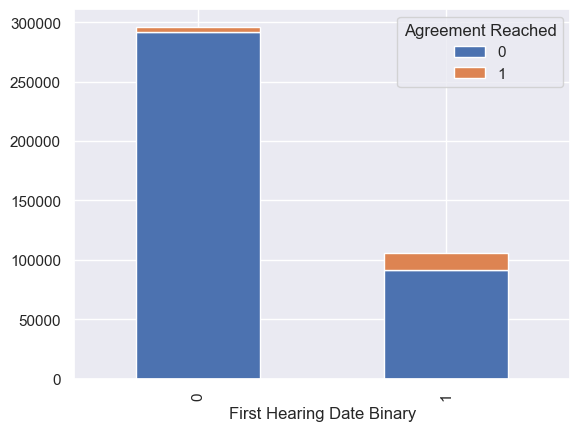

In [ ]:
cat_df = X_train.groupby([X_train["First Hearing Date Binary"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

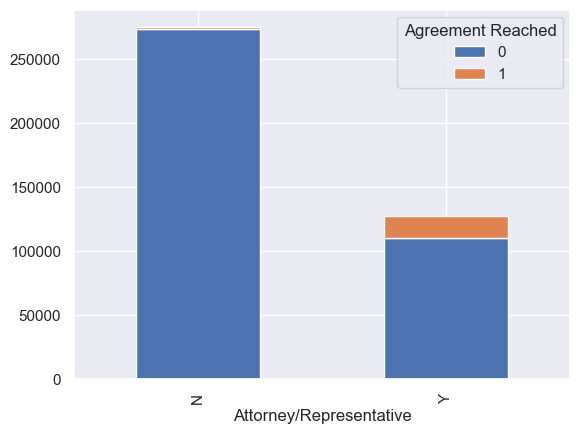

In [ ]:
cat_df = X_train.groupby([X_train["Attorney/Representative"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

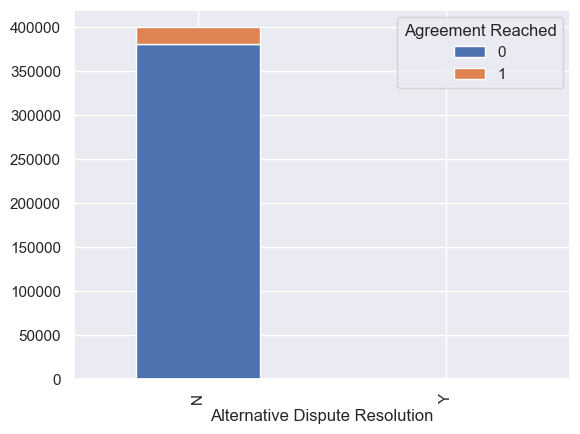

In [ ]:
cat_df = X_train.groupby([X_train["Alternative Dispute Resolution"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

There are barely any instances where Alternative Distribution is "Y".

In [ ]:
X_train.groupby("Alternative Dispute Resolution")["Alternative Dispute Resolution"].value_counts()

Alternative Dispute Resolution
N    399978
Y      1839
Name: count, dtype: int64

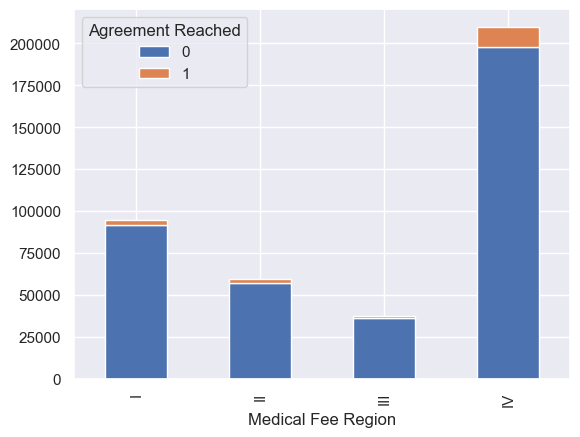

In [ ]:
cat_df = X_train.groupby([X_train["Medical Fee Region"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

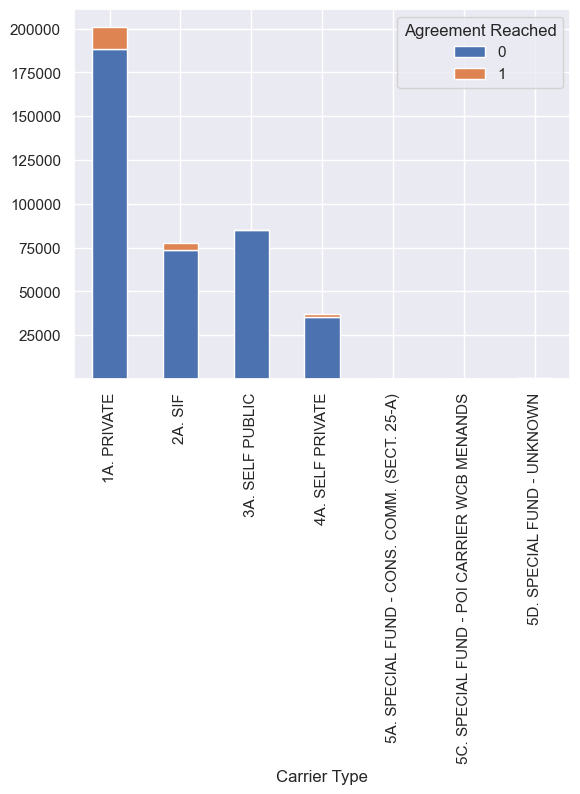

In [ ]:
cat_df = X_train.groupby([X_train["Carrier Type"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

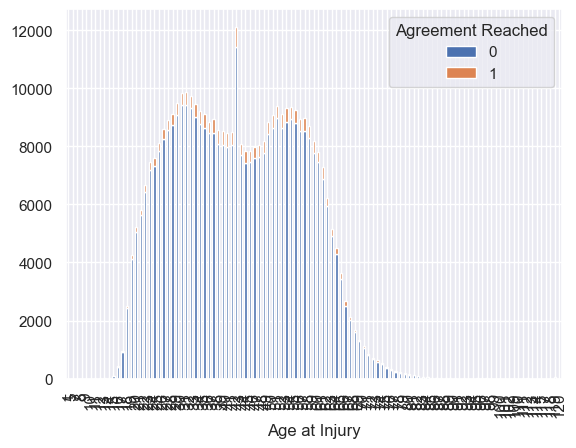

In [ ]:
cat_df = X_train.groupby([X_train["Age at Injury"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

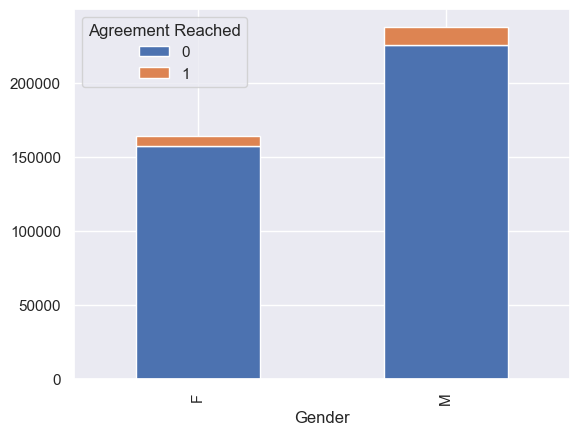

In [ ]:
cat_df = X_train.groupby([X_train["Gender"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

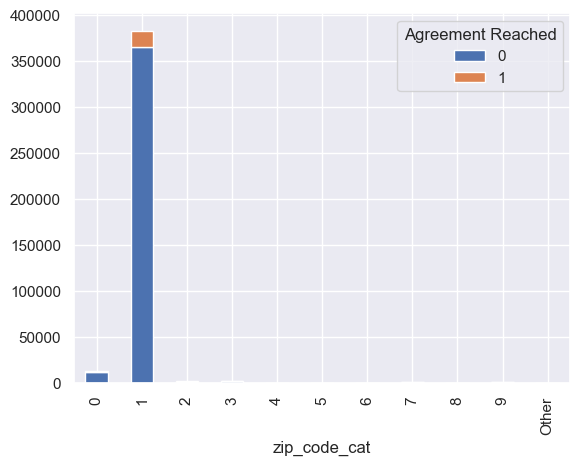

In [ ]:
cat_df = X_train.groupby([X_train['zip_code_cat'], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

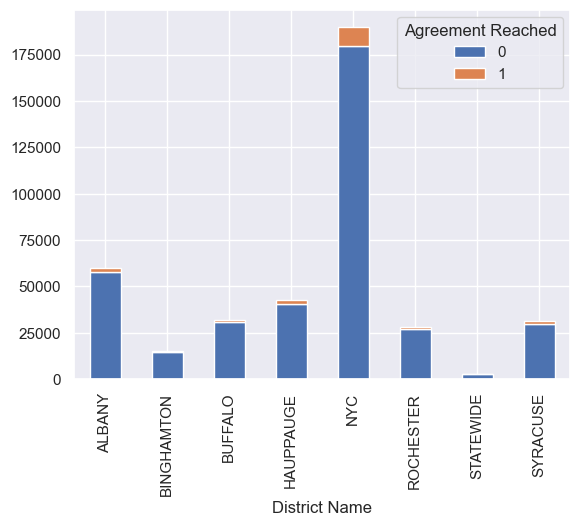

In [ ]:
cat_df = X_train.groupby([X_train['District Name'], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

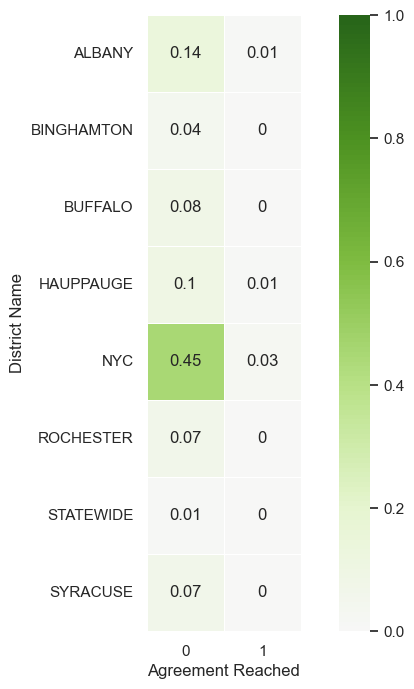

In [ ]:
cross = pd.crosstab(X_train['District Name'], y_train, normalize=True).round(2)

fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=cross, annot=True, 
            vmin=0, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

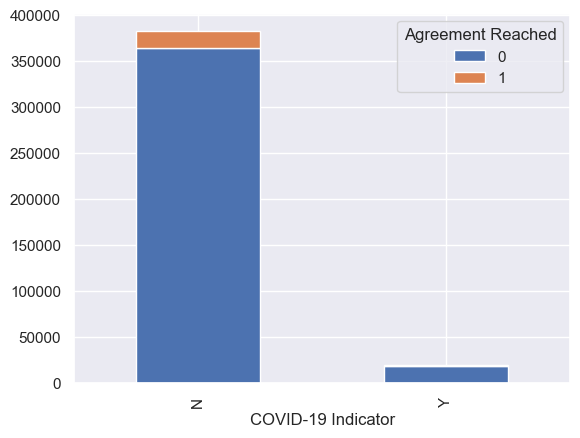

In [ ]:
cat_df = X_train.groupby([X_train['COVID-19 Indicator'], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

Taking a closer look at when the COVID Indicator is "Y". <br/>
<br/>
It seems whenever covid is present, the chance that it will be marked as "Non-comp" is higher.

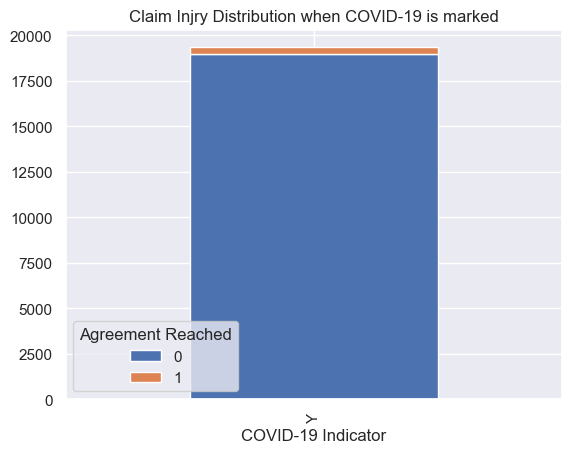

In [ ]:
covid_data = X_train[ X_train["COVID-19 Indicator"] == "Y"]
cat_df = covid_data.groupby([X_train['COVID-19 Indicator'], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.title("Claim Injry Distribution when COVID-19 is marked")
plt.show()

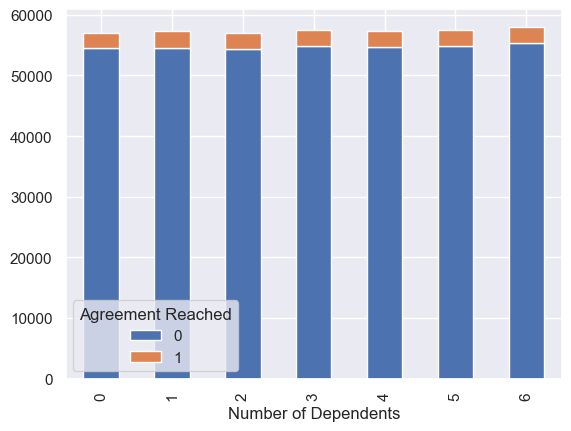

In [ ]:
cat_df = X_train.groupby([X_train["Number of Dependents"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

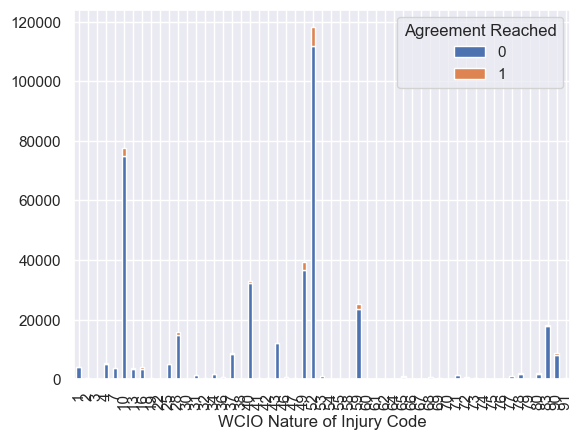

In [ ]:
cat_df = X_train.groupby([X_train["WCIO Nature of Injury Code"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

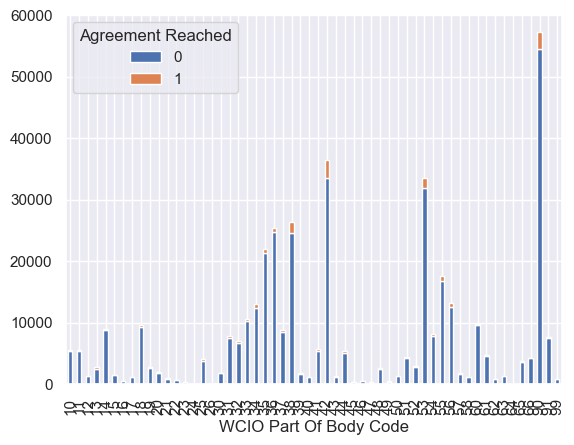

In [ ]:
cat_df = X_train.groupby([X_train["WCIO Part Of Body Code"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

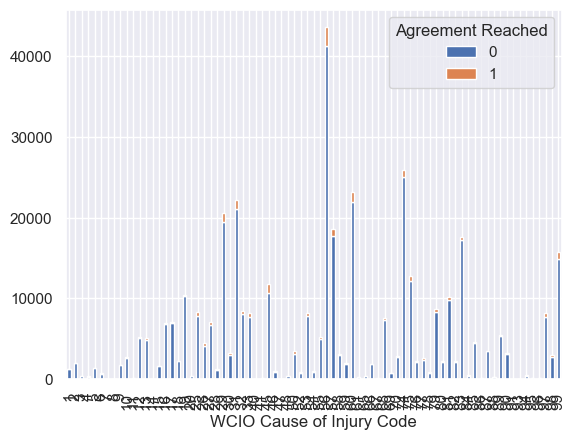

In [ ]:
cat_df = X_train.groupby([X_train["WCIO Cause of Injury Code"], y_train]).size().unstack()
cat_df.plot.bar(stacked=True)
plt.show()

In [ ]:
train_data.nunique()

Accident Date                          5539
Age at Injury                           110
Alternative Dispute Resolution            2
Assembly Date                           897
Attorney/Representative                   2
Average Weekly Wage                  120024
C-2 Date                               2475
C-3 Date                               1648
Carrier Name                           2045
Carrier Type                              7
County of Injury                         62
COVID-19 Indicator                        2
District Name                             8
First Hearing Date                     1094
Gender                                    2
IME-4 Count                              41
Industry Code                            24
Industry Code Description                20
Medical Fee Region                        4
WCIO Cause of Injury Code                77
WCIO Cause of Injury Description         74
WCIO Nature of Injury Code               56
WCIO Nature of Injury Descriptio

## 6. Outliers

In [ ]:
print(metric_features)

['Age at Injury', 'Average Weekly Wage', 'IME-4 Count', 'Number of Dependents']


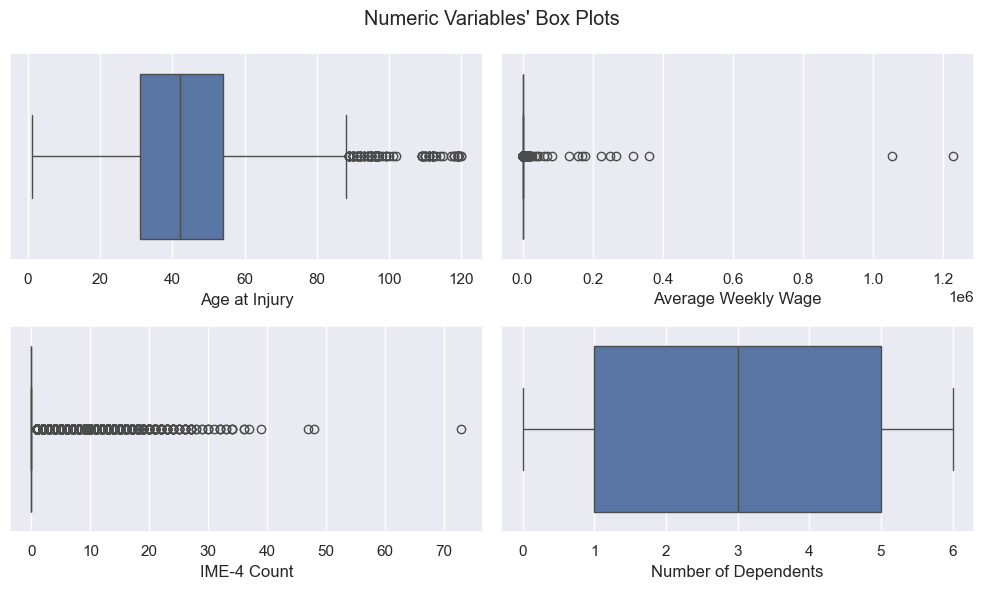

In [ ]:
# Plot ALL Numeric Variables' Histograms in one figure

sp_rows = 2
sp_cols = ceil(len(metric_features) / sp_rows)


# Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(10, 6),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=X_train[feat], ax=ax)
    
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the eda directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))


# plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)


plt.show()

In [ ]:
#Start by computing the interquartile range
q1 = X_train[metric_features].quantile(0.25)
q3 = X_train[metric_features].quantile(0.75)
iqr = q3 - q1

#Now we are going to compute the limits:
lower_lim = q1 - (1.5 * iqr)
upper_lim = q3 + (1.5 * iqr)

for feature in metric_features:
    print(f"{feature:<25}  Lower Limit: {lower_lim[feature]:>10}      Upper Limit: {upper_lim[feature]:>10}")

Age at Injury              Lower Limit:       -3.5      Upper Limit:       88.5
Average Weekly Wage        Lower Limit:  -1191.225      Upper Limit:   1985.375
IME-4 Count                Lower Limit:        0.0      Upper Limit:        0.0
Number of Dependents       Lower Limit:       -5.0      Upper Limit:       11.0


In [ ]:
def identify_outliers(train_data, metric_features, lower_lim, upper_lim):
    outliers = {}
    obvious_outliers = []

    for metric in metric_features:
        if metric not in train_data.columns:
            continue
        
        if metric not in lower_lim or metric not in upper_lim:
            continue
        
        outliers[metric] = []
        llim = lower_lim[metric]
        ulim = upper_lim[metric]
        
        for i, value in enumerate(train_data[metric]):
            if pd.isna(value):
                continue
            
            if value < llim or value > ulim:
                outliers[metric].append(value)
        
        print(f"Total outliers in {metric}: {len(outliers[metric])}")

    # Check for observations that are outliers in all features (Obvious Outliers)
    for index, row in train_data.iterrows():
        is_global_outlier = True
        for metric in metric_features:
            if metric not in train_data.columns or metric not in lower_lim or metric not in upper_lim:
                is_global_outlier = False
                break
            
            value = row[metric]
            if pd.isna(value):
                is_global_outlier = False
                break
            
            llim = lower_lim[metric]
            ulim = upper_lim[metric]
            
            if llim <= value <= ulim:
                is_global_outlier = False
                break
        
        if is_global_outlier:
            obvious_outliers.append(index)
    print("-----------------------------")
    print(f"Total global outliers: {len(obvious_outliers)}")
    return outliers, obvious_outliers
    
    
outliers, obvious_outliers = identify_outliers(X_train, metric_features, lower_lim, upper_lim)

Total outliers in Age at Injury: 205
Total outliers in Average Weekly Wage: 18848
Total outliers in IME-4 Count: 92925
Total outliers in Number of Dependents: 0
-----------------------------
Total global outliers: 0


As we could see, there is no observation that has every characteristic outside the interquartile range, since there is no outlier in 'Number of Dependents'.
But let's try this program again but without that feature, to see if there is any observation only with outliers, except on this feature!

In [ ]:
metric_features_test =["Age at Injury", "Average Weekly Wage", "IME-4 Count"]

In [ ]:
outliers, obvious_outliers = identify_outliers(X_train, metric_features_test, lower_lim, upper_lim)

Total outliers in Age at Injury: 205
Total outliers in Average Weekly Wage: 18848
Total outliers in IME-4 Count: 92925
-----------------------------
Total global outliers: 0


Now let's create a filter that will verify if an observation has every characteristic in the Interquartile Range or not 

In [ ]:
filters_iqr = []                                            
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters_iqr.append(X_train[metric].between(llim, ulim, inclusive='neither'))

filters_iqr_all = pd.concat(filters_iqr, axis=1).all(axis=1)

In [ ]:
filters_iqr

[Claim Identifier
 5567116    True
 5999566    True
 5423063    True
 5399772    True
 5662154    True
            ... 
 6075695    True
 5516538    True
 5652333    True
 5629937    True
 5930256    True
 Name: Age at Injury, Length: 401817, dtype: boolean,
 Claim Identifier
 5567116    True
 5999566    True
 5423063    True
 5399772    True
 5662154    True
            ... 
 6075695    True
 5516538    True
 5652333    True
 5629937    True
 5930256    True
 Name: Average Weekly Wage, Length: 401817, dtype: bool,
 Claim Identifier
 5567116    False
 5999566    False
 5423063    False
 5399772    False
 5662154    False
            ...  
 6075695    False
 5516538    False
 5652333    False
 5629937    False
 5930256    False
 Name: IME-4 Count, Length: 401817, dtype: bool,
 Claim Identifier
 5567116    True
 5999566    True
 5423063    True
 5399772    True
 5662154    True
            ... 
 6075695    True
 5516538    True
 5652333    True
 5629937    True
 5930256    True
 Name: Nu

In [ ]:
filters_iqr_all

Claim Identifier
5567116    False
5999566    False
5423063    False
5399772    False
5662154    False
           ...  
6075695    False
5516538    False
5652333    False
5629937    False
5930256    False
Length: 401817, dtype: boolean

In [ ]:
len(X_train[X_train[filters_iqr_all] == 'False'])      #These are the features that have at least one of its characteristics considered as an outlier (out of the IQR)

401817

In [ ]:
X_train_iqr = X_train[filters_iqr_all]
print('Percentage of data kept after removing outliers:', 100*(np.round(X_train_iqr.shape[0] / X_train.shape[0])))

Percentage of data kept after removing outliers: 0.0


It is not possible to take all of our datase, so we are going to perform a manual outlier Removal

#### 6.2.1 Manual Outlier Removal

##### ADD BOXPLOT

In [ ]:
filters_manual1 = (
                (X_train["Age at Injury"] <= 90)
                &
                (X_train["Average Weekly Wage"] <= 0.2*1e6)
                &
                (X_train["IME-4 Count"] < 10)                            
                #&
                #(X_train["Number of Dependents"])                        #There are no outliers here, so I think there is no manual restriction to make
)
X_train_out_man = X_train[filters_manual1]
filtered_indices = X_train_out_man.index
y_train = y_train.loc[filtered_indices]

In [ ]:
print('Percentage of data kept after removing outliers:', 100*(np.round(X_train_out_man.shape[0] / X_train.shape[0], decimals=5)))

Percentage of data kept after removing outliers: 99.027


In [ ]:
X_train_out = X_train[(filters_iqr_all | filters_manual1)]            #Only if the 2 filter says that the observation are outliers we remove!
filtered_indices = X_train_out.index
y_train = y_train.loc[filtered_indices]

print('Percentage of data kept after removing outliers:', 100*np.round(X_train_out.shape[0] / X_train.shape[0], 4))

Percentage of data kept after removing outliers: 99.03


<hr>

Temporary dataset creation

In [ ]:
train_preprocessed_df = pd.concat([X_train_out, y_train], axis=1)
train_preprocessed_df.to_csv("train_preprocessed.csv")

validation_preprocessed_df = pd.concat([X_val, y_val], axis=1)
validation_preprocessed_df.to_csv("validation_preprocessed.csv")

test_data.to_csv("test_preprocessed.csv")

In [ ]:
train_data = pd.read_csv("train_preprocessed.csv", low_memory=False)
validation_data = pd.read_csv("validation_preprocessed.csv", low_memory=False)
test_data = pd.read_csv("test_preprocessed.csv")

In [ ]:
train_data = train_data.set_index("Claim Identifier")
validation_data = validation_data.set_index("Claim Identifier")
test_data = test_data.set_index("Claim Identifier")

In [ ]:
train_data["Age at Injury"] = train_data["Age at Injury"].astype(int)
validation_data["Age at Injury"] = validation_data["Age at Injury"].astype(int)
test_data["Age at Injury"] = test_data["Age at Injury"].astype(int)

train_data["Number of Dependents"] = train_data["Number of Dependents"].astype(int)
validation_data["Number of Dependents"] = validation_data["Number of Dependents"].astype(int)
test_data["Number of Dependents"] = test_data["Number of Dependents"].astype(int)

train_data["WCIO Part Of Body Code"] = train_data["WCIO Part Of Body Code"].astype(int)
validation_data["WCIO Part Of Body Code"] = validation_data["WCIO Part Of Body Code"].astype(int)
test_data["WCIO Part Of Body Code"] = test_data["WCIO Part Of Body Code"].astype(int)

train_data["WCIO Nature of Injury Code"] = train_data["WCIO Nature of Injury Code"].astype(int)
validation_data["WCIO Nature of Injury Code"] = validation_data["WCIO Nature of Injury Code"].astype(int)
test_data["WCIO Nature of Injury Code"] = test_data["WCIO Nature of Injury Code"].astype(int)

train_data["WCIO Cause of Injury Code"] = train_data["WCIO Cause of Injury Code"].astype(int)
validation_data["WCIO Cause of Injury Code"] = validation_data["WCIO Cause of Injury Code"].astype(int)
test_data["WCIO Cause of Injury Code"] = test_data["WCIO Cause of Injury Code"].astype(int)

train_data["Industry Code"] = train_data["Industry Code"].astype(int)
validation_data["Industry Code"] = validation_data["Industry Code"].astype(int)
test_data["Industry Code"] = test_data["Industry Code"].astype(int)

train_data["Accident Date"] = pd.to_datetime(train_data['Accident Date'])
validation_data["Accident Date"] = pd.to_datetime(validation_data['Accident Date'])
test_data["Accident Date"] = pd.to_datetime(test_data['Accident Date'])

train_data["Assembly Date"] = pd.to_datetime(train_data['Assembly Date'])
validation_data["Assembly Date"] = pd.to_datetime(validation_data['Assembly Date'])
test_data["Assembly Date"] = pd.to_datetime(test_data['Assembly Date'])

train_data["C-2 Date"] = pd.to_datetime(train_data['C-2 Date'])
validation_data["C-2 Date"] = pd.to_datetime(validation_data['C-2 Date'])
test_data["C-2 Date"] = pd.to_datetime(test_data['C-2 Date'])

In [ ]:
X_train_out = train_data.drop('Agreement Reached', axis = 1)
y_train = train_data['Agreement Reached']

X_val = validation_data.drop('Agreement Reached', axis = 1)
y_val = validation_data['Agreement Reached']

## 7. Feature Engineering

During our previous steps we have already created vairables such as:
- zip_code_cat 
- C-3 Date Bin
- C-2 Date Bin
- First Hearing Date

In [ ]:
X_train_out.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'C-2 Date', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'Gender', 'IME-4 Count', 'Industry Code',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Number of Dependents', 'zip_code_cat', 'First Hearing Date Binary',
       'C-2 Date Bin', 'C-3 Date Bin'],
      dtype='object')

* Creating new feature Days Between Accident_Assembly

In [ ]:
# X_train_out.info()

In [ ]:
X_train_out["Days Between Accident_Assembly"] = (X_train_out['Assembly Date'] - X_train_out['Accident Date']).dt.days
negative_count = (X_train_out["Days Between Accident_Assembly"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_Assembly':", negative_count)

Number of rows with negative values in 'Days Between Accident_Assembly': 1128


In [ ]:
X_val["Days Between Accident_Assembly"] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days
negative_count = (X_val["Days Between Accident_Assembly"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_Assembly' in validation set:", negative_count)

Number of rows with negative values in 'Days Between Accident_Assembly' in validation set: 519


In [ ]:
test_data["Days Between Accident_Assembly"] = (test_data['Assembly Date'] - test_data['Accident Date']).dt.days

In [ ]:
metric_features.append("Days Between Accident_Assembly")
non_metric_features.remove("Assembly Date")
non_metric_features.remove("Accident Date")

* Creating new feature Days Between Accident_C2

In [ ]:
X_train_out["Days Between Accident_C2"] = (X_train_out['C-2 Date'] - X_train_out['Accident Date']).dt.days
negative_count = (X_train_out["Days Between Accident_C2"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_C2' in train set:", negative_count)

Number of rows with negative values in 'Days Between Accident_C2' in train set: 4459


In [ ]:
X_val["Days Between Accident_C2"] = (X_val['C-2 Date'] - X_val['Accident Date']).dt.days
negative_count = (X_val["Days Between Accident_C2"] < 0).sum()

print("Number of rows with negative values in 'Days Between Accident_C2' in validation set:", negative_count)

Number of rows with negative values in 'Days Between Accident_C2' in validation set: 1984


In [ ]:
test_data["Days Between Accident_C2"] = (test_data['C-2 Date'] - test_data['Accident Date']).dt.days

In [ ]:
metric_features.append("Days Between Accident_C2")
non_metric_features.remove("C-2 Date")

- Creating feature Season_of_Accident

In [ ]:
# Create a function to map month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'


X_train_out['Season_of_Accident'] = X_train_out['Accident Date'].dt.month.apply(get_season)
X_val['Season_of_Accident'] = X_val['Accident Date'].dt.month.apply(get_season)
test_data['Season_of_Accident'] = test_data['Accident Date'].dt.month.apply(get_season)

# Checking new feature 
print(X_train_out[['Accident Date', 'Season_of_Accident']].head())



                 Accident Date Season_of_Accident
Claim Identifier                                 
5567116             2020-09-23               Fall
5999566             2006-07-06             Summer
5423063             2020-02-03             Winter
5399772             2019-12-30             Winter
5662154             2021-02-17             Winter


In [ ]:
non_metric_features.append("Season_of_Accident")

Visualizing Season of Accident

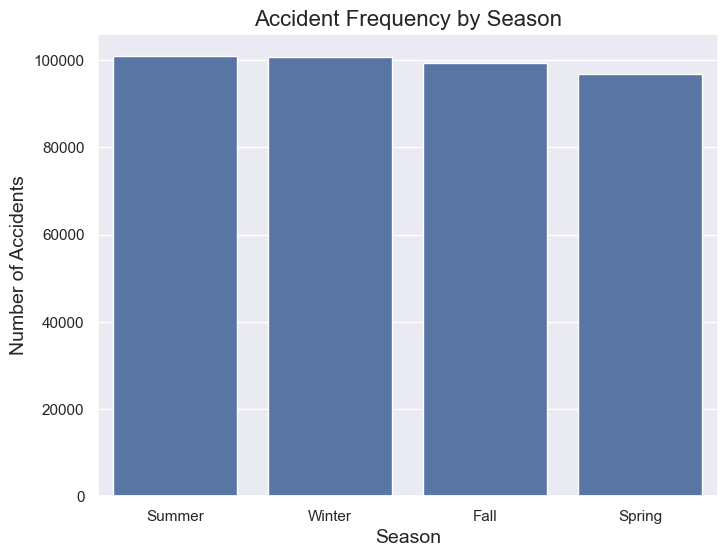

In [ ]:
season_counts = X_train_out['Season_of_Accident'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=season_counts.index, y=season_counts.values)
plt.title("Accident Frequency by Season", fontsize=16)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Number of Accidents", fontsize=14)
plt.show()

* Creating feature Age_Group 

In [ ]:
# bins = [0, 25, 35, 45, 55, 65, np.inf]
# labels = ['0-25', '26-35', '36-45', '46-55', '56-65', '65+']

# X_train_out['Age_Group'] = pd.cut(X_train_out['Age at Injury'], bins=bins, labels=labels)
# X_val['Age_Group'] = pd.cut(X_val['Age at Injury'], bins=bins, labels=labels)
# test_data['Age_Group'] = pd.cut(test_data['Age at Injury'], bins=bins, labels=labels)

# print(X_train_out[['Age at Injury', 'Age_Group']].head())
# non_metric_features.append("Age_Group")

                  Age at Injury Age_Group
Claim Identifier                         
5567116                      37     36-45
5999566                      39     36-45
5423063                      65     56-65
5399772                      27     26-35
5662154                      34     26-35


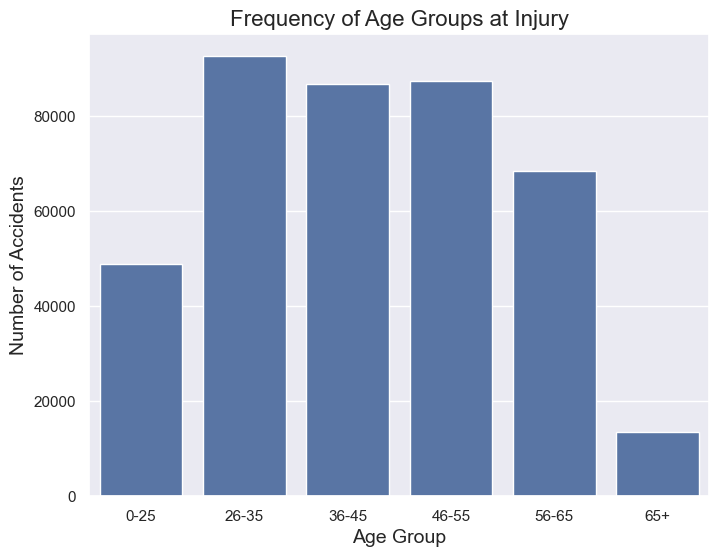

In [ ]:
# age_group_counts = X_train_out['Age_Group'].value_counts()

# # Plotting
# plt.figure(figsize=(8, 6))
# sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
# plt.title("Frequency of Age Groups at Injury", fontsize=16)
# plt.xlabel("Age Group", fontsize=14)
# plt.ylabel("Number of Accidents", fontsize=14)
# plt.show()

* Creating feature WCIO Part of Body_cat

In [ ]:
# def categorize_body_code(code):
#     if 10 <= code <= 19:
#         return 'Head'
#     elif 20 <= code <= 29:
#         return 'Neck'
#     elif 30 <= code <= 39:
#         return 'Upper Extremities'
#     elif 40 <= code <= 49:
#         return 'Trunk'
#     elif 50 <= code <= 59:
#         return 'Lower Extremities'
#     elif code in [64, 65, 66, 90, 91, 99]:
#         return 'Multiple Body Parts'
#     else:
#         return 'Unknown'


# X_train_out['WCIO Part of Body_cat'] = X_train_out['WCIO Part Of Body Code'].apply(categorize_body_code) # Corrected the column name
# X_val['WCIO Part of Body_cat'] = X_val['WCIO Part Of Body Code'].apply(categorize_body_code)
# test_data['WCIO Part of Body_cat'] = test_data['WCIO Part Of Body Code'].apply(categorize_body_code)
# non_metric_features.append("WCIO Part of Body_cat")

# print(X_train_out[['WCIO Part of Body_cat', 'WCIO Part Of Body Code']].head())


                 WCIO Part of Body_cat  WCIO Part Of Body Code
Claim Identifier                                              
5567116              Upper Extremities                      36
5999566              Lower Extremities                      54
5423063                          Trunk                      42
5399772                          Trunk                      48
5662154              Lower Extremities                      53


C:\Users\edume\AppData\Local\Temp\ipykernel_11596\2870307757.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=body_category_counts.index, y=body_category_counts.values, palette="viridis")


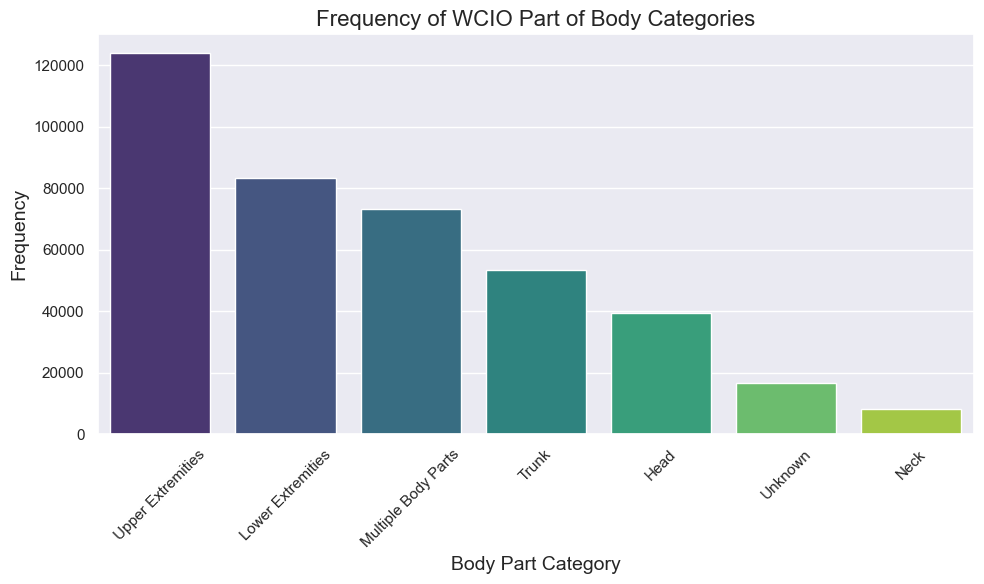

In [ ]:
# body_category_counts = X_train_out['WCIO Part of Body_cat'].value_counts() # Corrected the column name


# plt.figure(figsize=(10, 6))
# sns.barplot(x=body_category_counts.index, y=body_category_counts.values, palette="viridis")
# plt.title("Frequency of WCIO Part of Body Categories", fontsize=16)
# plt.xlabel("Body Part Category", fontsize=14)
# plt.ylabel("Frequency", fontsize=14)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

- Create feature WCIO Nature of Injury Code_cat

In [ ]:
# def categorize_nature_of_injury(code):
#     if  1<= code <= 59:
#         return 'Specific Injury'
#     elif 60 <= code <= 80:
#         return 'Occupational Disease or Cumulative Injury'
#     else:
#         return 'Multiple Injuries'
  

# X_train_out['WCIO Nature of Injury Code_cat'] = X_train_out['WCIO Nature of Injury Code'].apply(categorize_nature_of_injury)
# X_val['WCIO Nature of Injury Code_cat'] = X_val['WCIO Nature of Injury Code'].apply(categorize_nature_of_injury)
# test_data['WCIO Nature of Injury Code_cat'] = test_data['WCIO Nature of Injury Code'].apply(categorize_nature_of_injury)
# non_metric_features.append('WCIO Nature of Injury Code_cat')

# print(X_train_out[['WCIO Nature of Injury Code_cat', 'WCIO Nature of Injury Code']].head())

                 WCIO Nature of Injury Code_cat  WCIO Nature of Injury Code
Claim Identifier                                                           
5567116                         Specific Injury                          52
5999566                         Specific Injury                          52
5423063                         Specific Injury                          52
5399772                         Specific Injury                          59
5662154                         Specific Injury                          10


C:\Users\edume\AppData\Local\Temp\ipykernel_11596\3529978269.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nature_of_injury_category_counts.index, y=nature_of_injury_category_counts.values, palette="viridis")


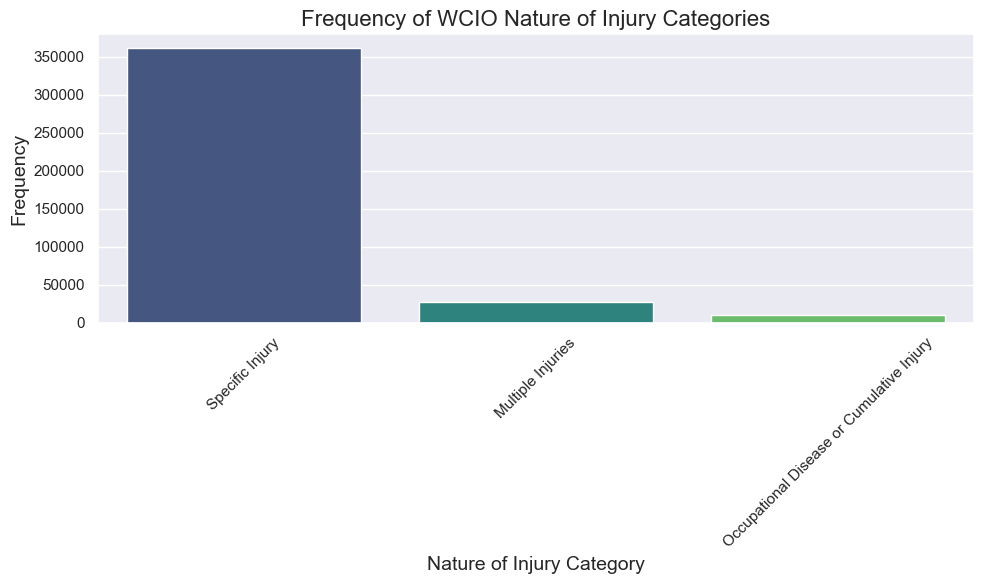

In [ ]:
# nature_of_injury_category_counts = X_train_out['WCIO Nature of Injury Code_cat'].value_counts()


# plt.figure(figsize=(10, 6))
# sns.barplot(x=nature_of_injury_category_counts.index, y=nature_of_injury_category_counts.values, palette="viridis")
# plt.title("Frequency of WCIO Nature of Injury Categories", fontsize=16)
# plt.xlabel("Nature of Injury Category", fontsize=14)
# plt.ylabel("Frequency", fontsize=14)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

* Create feature WCIO Cause of Injury Code_cat

In [ ]:
# def categorize_cause_of_injury(code):
#     if  code in [1, 2, 3, 4, 5, 6,7,8,9,11,14,84]:
#         return 'Burn or Scald'
#     elif code in [10,12,13,20]:
#         return 'Caught In, Under of Between'
#     elif 15<= code <= 19:
#         return 'Cut, Puncture, Scrape Injured By'
#     elif 25<= code <= 33:
#         return 'Fall, Slip or Trip Injury'
#     elif code in [40,41,45,46,47,48,50]:
#         return 'Motor Vehicle'
#     elif code in [52,53,54,55,56,57,58,59,60,61,97]:
#         return 'Strain or Injury By'
#     elif 65 <= code <= 70:
#         return 'Striking Against or Stepping On'
#     elif code in [74,75,76,77,78,79,80,81,85,86]:
#         return 'Struck or Injured By'
#     elif code in [94,95]:
#         return 'Rubbed or Abraded By'
#     else: 
#         return 'Miscellaneous Causes'

# X_train_out['WCIO Cause of Injury_cat'] = X_train_out['WCIO Cause of Injury Code'].apply(categorize_cause_of_injury)
# X_val['WCIO Cause of Injury_cat'] = X_val['WCIO Cause of Injury Code'].apply(categorize_cause_of_injury)
# test_data['WCIO Cause of Injury_cat'] = test_data['WCIO Cause of Injury Code'].apply(categorize_cause_of_injury)
# non_metric_features.append('WCIO Cause of Injury_cat')

# print(X_train_out[['WCIO Cause of Injury_cat', 'WCIO Cause of Injury Code']].head())

                 WCIO Cause of Injury_cat  WCIO Cause of Injury Code
Claim Identifier                                                    
5567116               Strain or Injury By                         59
5999566               Strain or Injury By                         54
5423063               Strain or Injury By                         56
5399772                     Burn or Scald                          6
5662154               Strain or Injury By                         56


C:\Users\edume\AppData\Local\Temp\ipykernel_11596\1914944349.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cause_of_injury_category_counts.index, y=cause_of_injury_category_counts.values, palette="viridis")


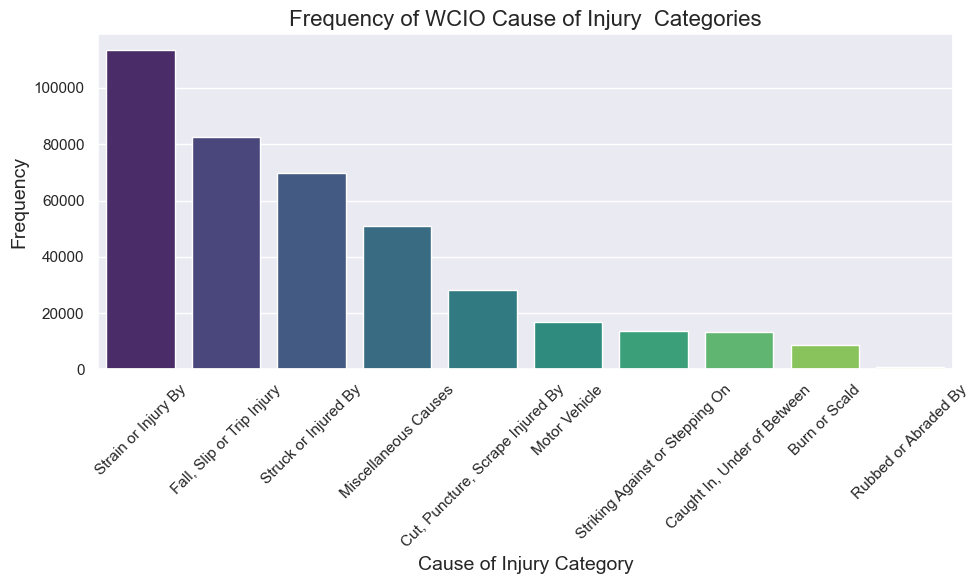

In [ ]:
# cause_of_injury_category_counts = X_train_out['WCIO Cause of Injury_cat'].value_counts()


# plt.figure(figsize=(10, 6))
# sns.barplot(x=cause_of_injury_category_counts.index, y=cause_of_injury_category_counts.values, palette="viridis")
# plt.title("Frequency of WCIO Cause of Injury  Categories", fontsize=16)
# plt.xlabel("Cause of Injury Category", fontsize=14)
# plt.ylabel("Frequency", fontsize=14)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

*  Average Weekly Wage by Industry

In [ ]:
industry_avg_wage = X_train_out.groupby('Industry Code')['Average Weekly Wage'].mean()

X_train_out['Industry_Avg_Weekly_Wage'] = X_train_out['Industry Code'].map(industry_avg_wage)
X_val['Industry_Avg_Weekly_Wage'] = X_val['Industry Code'].map(industry_avg_wage)
test_data['Industry_Avg_Weekly_Wage'] = test_data['Industry Code'].map(industry_avg_wage)

metric_features.append('Industry_Avg_Weekly_Wage')

print(X_train_out[['Industry_Avg_Weekly_Wage', 'Industry Code']].head())


                  Industry_Avg_Weekly_Wage  Industry Code
Claim Identifier                                         
5567116                         387.551675             31
5999566                         336.508327             49
5423063                         383.482644             62
5399772                         781.880900             92
5662154                         582.092670             48


C:\Users\edume\AppData\Local\Temp\ipykernel_11596\885021709.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_avg_wage.index, y=industry_avg_wage.values, palette="viridis")


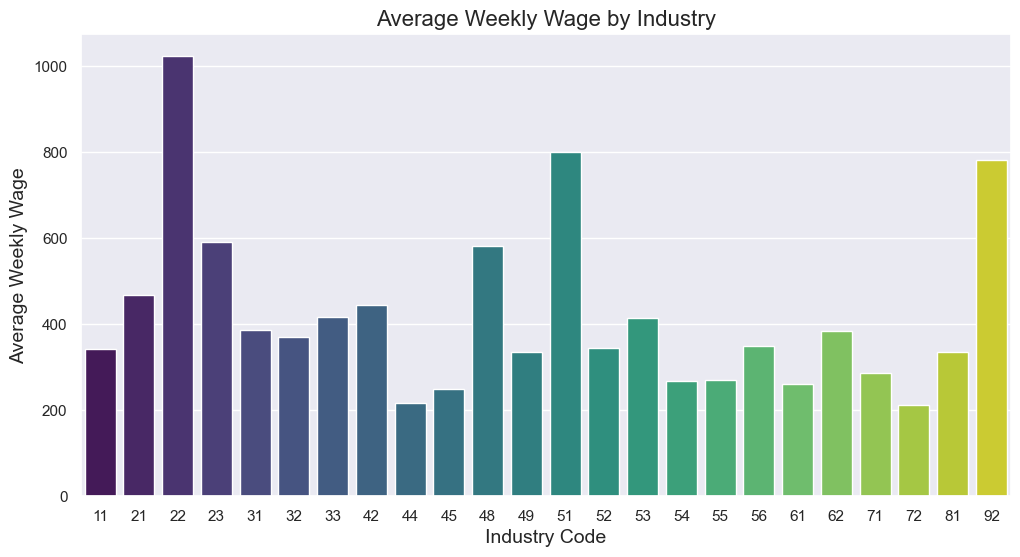

In [ ]:
plt.figure(figsize=(12, 6))

industry_avg_wage = X_train_out.groupby('Industry Code')['Industry_Avg_Weekly_Wage'].mean()

sns.barplot(x=industry_avg_wage.index, y=industry_avg_wage.values, palette="viridis")


plt.title("Average Weekly Wage by Industry", fontsize=16)
plt.xlabel("Industry Code", fontsize=14)
plt.ylabel("Average Weekly Wage", fontsize=14)

plt.show()

* Claim Count by Carrier Type
<br> This feature counts how many claims each Carrier Type has.

In [ ]:
# Save the original indices before merging
original_index_train = X_train_out.index
original_index_val = X_val.index
original_index_test = test_data.index

# Group by 'Carrier Type' and count the number of claims
claim_count_by_carrier = X_train_out.groupby('Carrier Type').size().to_frame(name='Claim Count by Carrier')

# Merge the aggregated data back to all subsets
X_train_out = X_train_out.merge(claim_count_by_carrier, on='Carrier Type', how='left')
X_val = X_val.merge(claim_count_by_carrier, on='Carrier Type', how='left')
test_data = test_data.merge(claim_count_by_carrier, on='Carrier Type', how='left')

# Reassign the original indices back to the merged DataFrames
X_train_out.index = original_index_train
X_val.index = original_index_val
test_data.index = original_index_test

# Append the new feature to metric_features
metric_features.append('Claim Count by Carrier')

# Debugging: Check if the new feature is correctly added
print(X_train_out[['Carrier Type', 'Claim Count by Carrier']].head())
print(X_val[['Carrier Type', 'Claim Count by Carrier']].head())
print(test_data[['Carrier Type', 'Claim Count by Carrier']].head())

                     Carrier Type  Claim Count by Carrier
Claim Identifier                                         
5567116               1A. PRIVATE                  198529
5999566               1A. PRIVATE                  198529
5423063               1A. PRIVATE                  198529
5399772           3A. SELF PUBLIC                   84891
5662154               1A. PRIVATE                  198529
                      Carrier Type  Claim Count by Carrier
Claim Identifier                                          
5620706                1A. PRIVATE                  198529
5847119           4A. SELF PRIVATE                   36852
6111910                1A. PRIVATE                  198529
5835853                    2A. SIF                   76960
5580518                    2A. SIF                   76960
                 Carrier Type  Claim Count by Carrier
Claim Identifier                                     
6165911           1A. PRIVATE                  198529
6166141           1

C:\Users\edume\AppData\Local\Temp\ipykernel_11596\3536545228.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


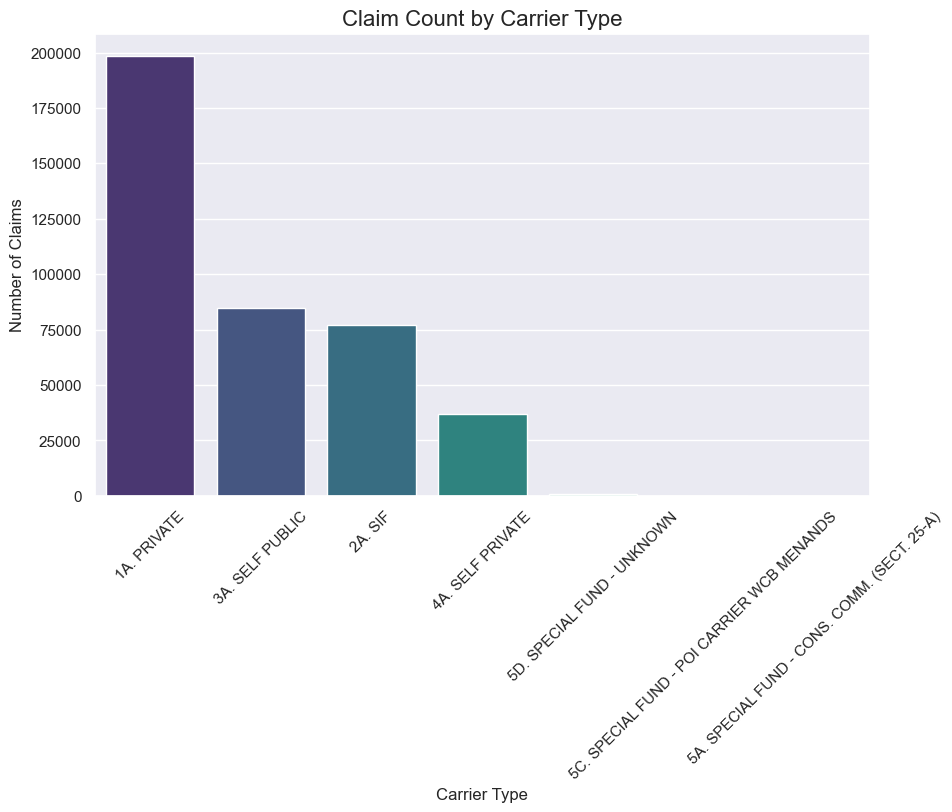

In [ ]:
carrier_counts = claim_count_by_carrier.sort_values(by='Claim Count by Carrier', ascending=False)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=carrier_counts.index, 
    y=carrier_counts['Claim Count by Carrier'], 
    palette="viridis"
)
plt.title("Claim Count by Carrier Type", fontsize=16)
plt.xlabel("Carrier Type", fontsize=12)
plt.ylabel("Number of Claims", fontsize=12)
plt.xticks(rotation=45)
plt.show()

* Claim Count by Gender

In [ ]:
# Save the original index before merging for 'Gender' feature
original_index_train = X_train_out.index
original_index_val = X_val.index
original_index_test = test_data.index

# Group by 'Gender' and count the number of claims using the index (without resetting)
claim_count_by_gender = X_train_out.groupby('Gender').size().to_frame(name='Claim Count by Gender')

# Merge the aggregated data back to all subsets
X_train_out = X_train_out.merge(claim_count_by_gender, on='Gender', how='left')
X_val = X_val.merge(claim_count_by_gender, on='Gender', how='left')
test_data = test_data.merge(claim_count_by_gender, on='Gender', how='left')

# Reassign the original index back to the merged DataFrame
X_train_out.index = original_index_train
X_val.index = original_index_val
test_data.index = original_index_test

# Append the new feature to metric_features
metric_features.append('Claim Count by Gender')

# Debugging: Check if the new feature is correctly added
print(X_train_out[['Gender', 'Claim Count by Gender']].head())
print(X_val[['Gender', 'Claim Count by Gender']].head())
print(test_data[['Gender', 'Claim Count by Gender']].head())

                 Gender  Claim Count by Gender
Claim Identifier                              
5567116               M                 235528
5999566               M                 235528
5423063               F                 162378
5399772               F                 162378
5662154               F                 162378
                 Gender  Claim Count by Gender
Claim Identifier                              
5620706               M                 235528
5847119               M                 235528
6111910               M                 235528
5835853               F                 162378
5580518               F                 162378
                 Gender  Claim Count by Gender
Claim Identifier                              
6165911               M                 235528
6166141               F                 162378
6165907               F                 162378
6166047               F                 162378
6166102               M                 235528


C:\Users\edume\AppData\Local\Temp\ipykernel_11596\1479294251.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


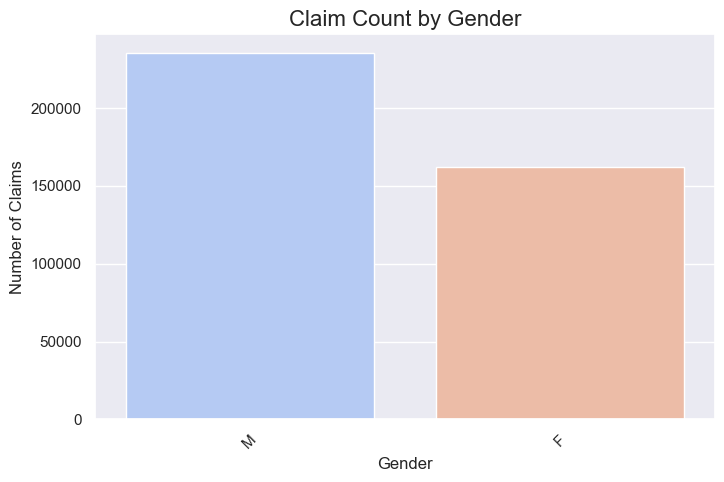

In [ ]:
gender_counts = claim_count_by_gender.sort_values(by='Claim Count by Gender', ascending=False)

# Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(
    x=gender_counts.index,
    y=gender_counts['Claim Count by Gender'],
    palette="coolwarm"
)
plt.title("Claim Count by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Claims", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
X_train_out.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'C-2 Date', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'Gender', 'IME-4 Count', 'Industry Code',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Number of Dependents', 'zip_code_cat', 'First Hearing Date Binary',
       'C-2 Date Bin', 'C-3 Date Bin', 'Days Between Accident_Assembly',
       'Days Between Accident_C2', 'Season_of_Accident', 'Age_Group',
       'WCIO Part of Body_cat', 'WCIO Nature of Injury Code_cat',
       'WCIO Cause of Injury_cat', 'Industry_Avg_Weekly_Wage',
       'Claim Count by Carrier', 'Claim Count by Gender'],
      dtype='object')

In [ ]:
variables_to_drop = ['C-2 Date', 'Accident Date','Assembly Date']
X_train_out = X_train_out.drop(variables_to_drop, axis = 1)
X_val = X_val.drop(variables_to_drop, axis = 1)
test_data = test_data.drop(variables_to_drop, axis = 1)

In [ ]:
metric_features

['Age at Injury',
 'Average Weekly Wage',
 'IME-4 Count',
 'Number of Dependents',
 'Days Between Accident_Assembly',
 'Days Between Accident_C2',
 'Industry_Avg_Weekly_Wage',
 'Claim Count by Carrier',
 'Claim Count by Gender']

In [ ]:
non_metric_features

['Industry Code',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Alternative Dispute Resolution',
 'Attorney/Representative',
 'Carrier Type',
 'County of Injury',
 'COVID-19 Indicator',
 'District Name',
 'Gender',
 'Medical Fee Region',
 'zip_code_cat',
 'First Hearing Date Binary',
 'C-2 Date Bin',
 'C-3 Date Bin',
 'Season_of_Accident',
 'Age_Group',
 'WCIO Part of Body_cat',
 'WCIO Nature of Injury Code_cat',
 'WCIO Cause of Injury_cat']

##### Finding negative values in Metric columns and fixing them

In [ ]:
print("X_train with values in [Days Between Accident_Assembly] that are negative: " + str(len(X_train_out[ X_train_out["Days Between Accident_Assembly"] < 0])) + ".")
print("X_val with values in [Days Between Accident_Assembly] that are negative: " + str(len(X_val[ X_val["Days Between Accident_Assembly"] < 0])) + ".")

X_train with values in [Days Between Accident_Assembly] that are negative: 1128.
X_val with values in [Days Between Accident_Assembly] that are negative: 519.


In [ ]:
print("X_train with values in [Days Between Accident_C2] that are negative: " + str(len(X_train_out[ X_train_out["Days Between Accident_C2"] < 0])) + ".")
print("X_val with values in [Days Between Accident_C2] that are negative: " + str(len(X_val[ X_val["Days Between Accident_C2"] < 0])) + ".")

X_train with values in [Days Between Accident_C2] that are negative: 4459.
X_val with values in [Days Between Accident_C2] that are negative: 1984.


In [ ]:
print("X_train with values in [Age at Injury] that are negative: " + str(len(X_train_out[ X_train_out["Age at Injury"] < 0])) + ".")
print("X_val with values in [Age at Injury] that are negative: " + str(len(X_val[ X_val["Age at Injury"] < 0])) + ".")

X_train with values in [Age at Injury] that are negative: 0.
X_val with values in [Age at Injury] that are negative: 0.


In [ ]:
# X_train[ X_train["Days Between Accident_Assembly"] < 0]["Days Between Accident_Assembly"] = 0
X_train_out["Days Between Accident_Assembly"] = X_train_out["Days Between Accident_Assembly"].clip(lower=0)
X_val["Days Between Accident_Assembly"] = X_val["Days Between Accident_Assembly"].clip(lower=0)
test_data["Days Between Accident_Assembly"] = test_data["Days Between Accident_Assembly"].clip(lower=0)

In [ ]:
X_train_out["Days Between Accident_C2"] = X_train_out["Days Between Accident_C2"].clip(lower=0)
X_val["Days Between Accident_C2"] = X_val["Days Between Accident_C2"].clip(lower=0)
test_data["Days Between Accident_C2"] = test_data["Days Between Accident_C2"].clip(lower=0)

## 8. Data Transformation - Encoding and Scaling 

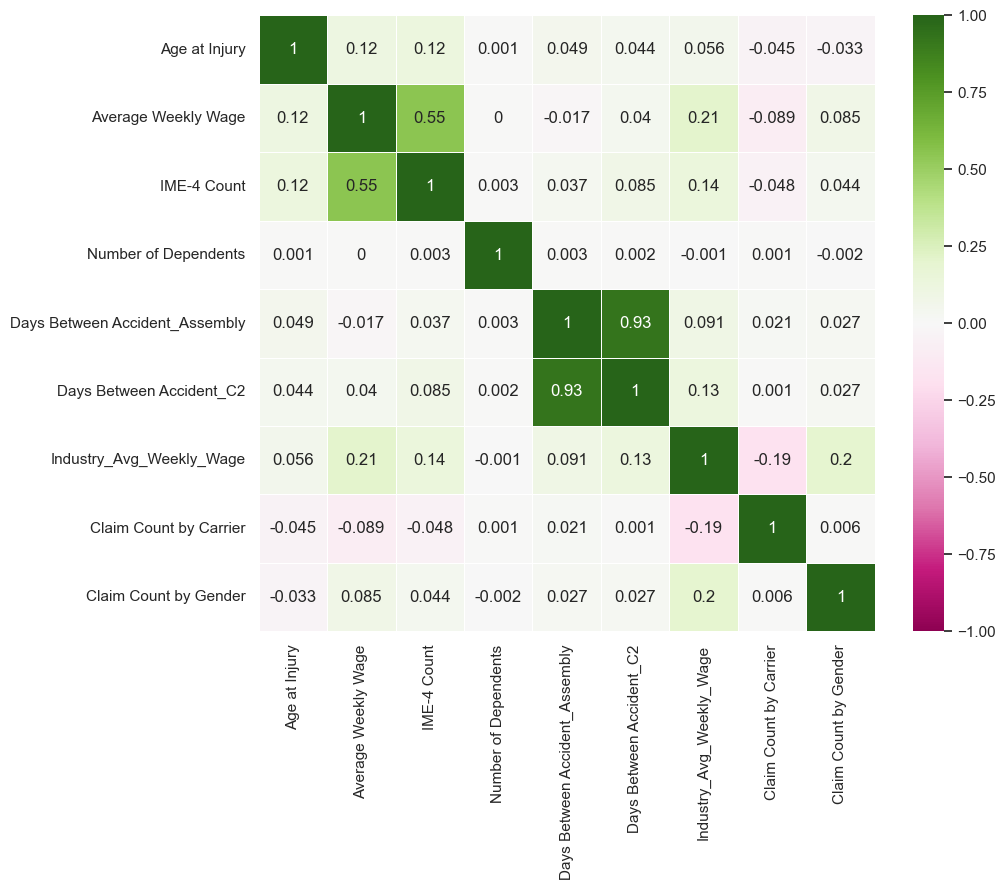

In [ ]:
fig = plt.figure(figsize=(10, 8))

# Use spearman correlation 
corr = X_train_out[metric_features].corr(method="spearman").round(3)

# Plot heatmap
sns.heatmap(data=corr, annot=True, 
            # fmt='s',
            vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5,
            cmap='PiYG')
plt.show()

In [ ]:
non_metric_features

['Industry Code',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Alternative Dispute Resolution',
 'Attorney/Representative',
 'Carrier Type',
 'County of Injury',
 'COVID-19 Indicator',
 'District Name',
 'Gender',
 'Medical Fee Region',
 'zip_code_cat',
 'First Hearing Date Binary',
 'C-2 Date Bin',
 'C-3 Date Bin',
 'Season_of_Accident',
 'Age_Group',
 'WCIO Part of Body_cat',
 'WCIO Nature of Injury Code_cat',
 'WCIO Cause of Injury_cat']

In [ ]:
X_val[non_metric_features].head()

,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Alternative Dispute Resolution,Attorney/Representative,Carrier Type,County of Injury,COVID-19 Indicator,District Name,...,Medical Fee Region,zip_code_cat,First Hearing Date Binary,C-2 Date Bin,C-3 Date Bin,Season_of_Accident,Age_Group,WCIO Part of Body_cat,WCIO Nature of Injury Code_cat,WCIO Cause of Injury_cat
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5620706,49,83,83,91,N,N,1A. PRIVATE,KINGS,Y,NYC,...,IV,1,0,1,0,Winter,26-35,Multiple Body Parts,Multiple Injuries,Miscellaneous Causes
5847119,33,2,4,35,N,N,4A. SELF PRIVATE,DELAWARE,N,BINGHAMTON,...,I,1,0,1,0,Fall,0-25,Upper Extremities,Specific Injury,Burn or Scald
6111910,53,1,59,14,N,N,1A. PRIVATE,NEW YORK,N,NYC,...,IV,1,0,1,0,Fall,46-55,Head,Specific Injury,Burn or Scald
5835853,62,31,10,53,N,Y,2A. SIF,RICHMOND,N,NYC,...,IV,1,1,1,1,Spring,46-55,Lower Extremities,Specific Injury,"Fall, Slip or Trip Injury"
5580518,62,60,52,42,N,N,2A. SIF,RICHMOND,N,NYC,...,IV,1,0,1,0,Fall,46-55,Trunk,Specific Injury,Strain or Injury By


In [ ]:
X_train_out[non_metric_features].head()
# 'WCIO Nature of Injury Code_cat'

,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Alternative Dispute Resolution,Attorney/Representative,Carrier Type,County of Injury,COVID-19 Indicator,District Name,...,Medical Fee Region,zip_code_cat,First Hearing Date Binary,C-2 Date Bin,C-3 Date Bin,Season_of_Accident,Age_Group,WCIO Part of Body_cat,WCIO Nature of Injury Code_cat,WCIO Cause of Injury_cat
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5567116,31,59,52,36,N,N,1A. PRIVATE,SULLIVAN,N,ALBANY,...,I,1,0,1,0,Fall,36-45,Upper Extremities,Specific Injury,Strain or Injury By
5999566,49,54,52,54,N,Y,1A. PRIVATE,WESTCHESTER,N,NYC,...,III,1,0,1,0,Summer,36-45,Lower Extremities,Specific Injury,Strain or Injury By
5423063,62,56,52,42,N,Y,1A. PRIVATE,NASSAU,N,NYC,...,IV,1,1,1,1,Winter,56-65,Trunk,Specific Injury,Strain or Injury By
5399772,92,6,59,48,N,N,3A. SELF PUBLIC,RICHMOND,N,NYC,...,IV,1,0,1,0,Winter,26-35,Trunk,Specific Injury,Burn or Scald
5662154,48,56,10,53,N,N,1A. PRIVATE,KINGS,N,NYC,...,IV,1,0,1,0,Winter,26-35,Lower Extremities,Specific Injury,Strain or Injury By


In [ ]:
test_data[non_metric_features].head()
#'WCIO Cause of Injury_cat'

,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Alternative Dispute Resolution,Attorney/Representative,Carrier Type,County of Injury,COVID-19 Indicator,District Name,...,Medical Fee Region,zip_code_cat,First Hearing Date Binary,C-2 Date Bin,C-3 Date Bin,Season_of_Accident,Age_Group,WCIO Part of Body_cat,WCIO Nature of Injury Code_cat,WCIO Cause of Injury_cat
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,48,31,10,54,N,N,1A. PRIVATE,BRONX,N,NYC,...,IV,1,0,1,0,Winter,0-25,Lower Extremities,Specific Injury,"Fall, Slip or Trip Injury"
6166141,45,75,10,10,N,N,1A. PRIVATE,QUEENS,N,NYC,...,IV,1,0,1,0,Fall,0-25,Head,Specific Injury,Struck or Injured By
6165907,56,68,49,62,N,N,1A. PRIVATE,WESTCHESTER,N,NYC,...,III,1,0,1,0,Winter,56-65,Unknown,Specific Injury,Striking Against or Stepping On
6166047,48,25,10,53,N,N,1A. PRIVATE,QUEENS,N,NYC,...,IV,1,0,1,0,Winter,46-55,Lower Extremities,Specific Injury,"Fall, Slip or Trip Injury"
6166102,55,79,40,37,N,N,1A. PRIVATE,KINGS,N,NYC,...,IV,1,0,1,0,Winter,0-25,Upper Extremities,Specific Injury,Struck or Injured By


### 8.1 Feature Encoding

Label Encoder for target variable (training and validation):

In [ ]:
#Initiate Label encoder
label_encoder = LabelEncoder()

#Fit the encoder on the training target variable
Y_train_encoded = label_encoder.fit_transform(y_train)

#Transform the training and validation target variable
Y_val_encoded = label_encoder.transform(y_val)

#Convert the results back to DataFrames
Y_train_encoded_df = pd.DataFrame(Y_train_encoded, columns=['encoded_target'], index=pd.Series(y_train.index))
Y_val_encoded_df = pd.DataFrame(Y_val_encoded, columns=['encoded_target'], index=pd.Series(y_val.index))

In [ ]:
Y_train_encoded_df.head()

,encoded_target
Claim Identifier,
5567116,0
5999566,1
5423063,1
5399772,0
5662154,0


In [ ]:
Y_val_encoded_df.tail()

,encoded_target
Claim Identifier,
5853427,0
5926398,0
5891694,0
5926019,0
5678133,0


One hot encoder for dependent variables (non-metric): (only for training and validation)

In [ ]:
X_train_copy = X_train_out.copy()
X_val_copy = X_val.copy()
test_data_copy = test_data.copy()

In [ ]:
print(X_val_copy[non_metric_features].columns)

Index(['Industry Code', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Alternative Dispute Resolution', 'Attorney/Representative',
       'Carrier Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'Gender', 'Medical Fee Region', 'zip_code_cat',
       'First Hearing Date Binary', 'C-2 Date Bin', 'C-3 Date Bin',
       'Season_of_Accident', 'Age_Group', 'WCIO Part of Body_cat',
       'WCIO Nature of Injury Code_cat', 'WCIO Cause of Injury_cat'],
      dtype='object')


In [ ]:
X_val_copy[non_metric_features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 172208 entries, 5620706 to 5678133
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   Industry Code                   172208 non-null  int32   
 1   WCIO Cause of Injury Code       172208 non-null  int32   
 2   WCIO Nature of Injury Code      172208 non-null  int32   
 3   WCIO Part Of Body Code          172208 non-null  int32   
 4   Alternative Dispute Resolution  172208 non-null  object  
 5   Attorney/Representative         172208 non-null  object  
 6   Carrier Type                    172208 non-null  object  
 7   County of Injury                172208 non-null  object  
 8   COVID-19 Indicator              172208 non-null  object  
 9   District Name                   172208 non-null  object  
 10  Gender                          172208 non-null  object  
 11  Medical Fee Region              172208 non-null  object  
 12  

Considering all of the codes of WCIO

In [ ]:
X_train['WCIO Nature of Injury Code'].unique()

<IntegerArray>
[52, 59, 10, 43, 40,  4, 49, 13, 83, 31, 28, 69, 78, 25, 65, 77, 73, 90, 58,
 91, 34,  1, 37,  7, 68, 30, 16, 72, 36, 53, 80, 47, 41, 61, 46, 19, 66,  2,
 74, 38, 32, 71, 75, 60, 55,  3, 42, 79, 54, 64, 76, 70, 22, 62, 67]
Length: 55, dtype: Int64

In [ ]:
X_val['WCIO Nature of Injury Code'].unique()

array([83,  4, 59, 10, 52, 37, 49, 28, 25,  7, 40, 68,  1, 90, 43, 72, 31,
       47, 77, 16, 80, 73, 71, 46, 36, 13, 53, 66,  2, 41, 38, 19, 69, 58,
       91, 65, 34, 55, 78, 61, 60, 42, 75,  3, 54, 30, 74, 32, 64, 63, 70,
       67, 76, 62])

In [ ]:
non_metric_features=[ 'Industry Code','Alternative Dispute Resolution',
 'Attorney/Representative',
 'Carrier Type',
 'County of Injury',
 'COVID-19 Indicator',
 'District Name',
 'Gender',
 'Medical Fee Region',
 'zip_code_cat',
 'First Hearing Date Binary',
 'C-2 Date Bin',
 'C-3 Date Bin',
 'Season_of_Accident',
 'Age_Group',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code'
 ]

In [ ]:
# Initialize the encoder with the chosen settings
ohc = OneHotEncoder(sparse_output=False, drop="first", handle_unknown='ignore')

# Fit the encoder on the training set only
ohc.fit(X_train_copy[non_metric_features])  

# Transform the training set
ohc_train_features = ohc.transform(X_train_copy[non_metric_features])
ohc_train_df = pd.DataFrame(ohc_train_features, index=X_train_copy.index, columns=ohc.get_feature_names_out(non_metric_features))

# Concatenate the encoded features back to the training set
X_train_encoded = pd.concat([X_train_copy.drop(columns=non_metric_features), ohc_train_df], axis=1)

# Transform the validation set using the same encoder (do not fit again)
ohc_val_features = ohc.transform(X_val_copy[non_metric_features])
ohc_val_df = pd.DataFrame(ohc_val_features, index= X_val_copy.index, columns=ohc.get_feature_names_out(non_metric_features))

# Concatenate the encoded features back to the validation set
X_val_encoded = pd.concat([X_val_copy.drop(columns=non_metric_features), ohc_val_df], axis=1)

# Transform the test set using the same encoder (do not fit again)
ohc_test_features = ohc.transform(test_data_copy[non_metric_features])
ohc_test_df = pd.DataFrame(ohc_test_features, index= test_data_copy.index, columns=ohc.get_feature_names_out(non_metric_features))

# Concatenate the encoded features back to the test set
test_data_encoded = pd.concat([test_data_copy.drop(columns=non_metric_features), ohc_test_df], axis=1)

c:\Programming\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Programming\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### 8.2 Min-max Scaler

Min-max scaler for dependent variables (metric):

In [ ]:
# X_train_out[metric_features].head(10)

In [ ]:
# # Create a MinMaxScaler instance
# scaler = MinMaxScaler()

# # Fit the scaler on the training set and transform the training features
# scaled_feat = scaler.fit_transform(X_train_copy[metric_features])

# # Convert the scaled features back to a DataFrame 
# scaled_feat_df = pd.DataFrame(scaled_feat, columns=metric_features, index=X_train_copy.index)

# # Concatenate the scaled features back to the original DataFrames
# X_train_min_max_scaled = pd.concat([X_train_copy.drop(columns=metric_features), scaled_feat_df], axis=1)
# X_train_min_max_scaled_encoded = pd.concat([X_train_encoded.drop(columns=metric_features), scaled_feat_df], axis=1)

# # Transform the validation set using the same scaler (do not fit again)
# scaled_feat = scaler.transform(X_val_copy[metric_features])

# # Convert the scaled features back to a DataFrame 
# scaled_feat_df = pd.DataFrame(scaled_feat, columns=metric_features, index=X_val_copy.index)

# # Concatenate the scaled features back to the original DataFrames
# X_val_min_max_scaled = pd.concat([X_val_copy.drop(columns=metric_features), scaled_feat_df], axis=1)
# X_val_min_max_scaled_encoded = pd.concat([X_val_encoded.drop(columns=metric_features), scaled_feat_df], axis=1)

# # Transform the test set using the same scaler (do not fit again)
# scaled_feat = scaler.transform(test_data_copy[metric_features])

# # Convert the scaled features back to a DataFrame 
# scaled_feat_df = pd.DataFrame(scaled_feat, columns=metric_features, index=test_data_copy.index)

# # Concatenate the scaled features back to the original DataFrames
# test_min_max_scaled = pd.concat([test_data_copy.drop(columns=metric_features), scaled_feat_df], axis=1)
# test_min_max_scaled_encoded = pd.concat([test_data_encoded.drop(columns=metric_features), scaled_feat_df], axis=1)


In [ ]:
# X_train_min_max_scaled[metric_features].describe().round(2).T

In [ ]:
# X_val_min_max_scaled[metric_features].describe().round(2).T
# # Days between accident assembly & days between accident C2 have min values != from zero!! 

In [ ]:
# test_min_max_scaled[metric_features].describe().round(2).T
# # avg weekly wage max value very different from 1. 

### 8.3 Standard Scaler

Standard scaler for dependent variables (metric):

In [ ]:
#Create a StandardScaler instance
standard_scaler = StandardScaler()

#Fit the scaler on the training set and transform the training features
standard_scaled_feat = standard_scaler.fit_transform(X_train_copy[metric_features])

#Convert the scaled features back to a DataFrame for better usability
standard_scaled_feat_df = pd.DataFrame(standard_scaled_feat, columns=metric_features, index=X_train_copy.index)

#Concatenate the scaled features back to the original DataFrames
X_train_std_scaler = pd.concat([X_train_copy.drop(columns=metric_features), standard_scaled_feat_df], axis=1)
X_train_std_scaler_encoded = pd.concat([X_train_encoded.drop(columns=metric_features), standard_scaled_feat_df], axis=1)

#Transform the validation set using the same scaler (do not fit again)
standard_scaled_feat = standard_scaler.transform(X_val_copy[metric_features])

#Convert the scaled features back to a DataFrame for better usability
standard_scaled_feat_df = pd.DataFrame(standard_scaled_feat, columns=metric_features, index=X_val_copy.index)

#Concatenate the scaled features back to the original DataFrames
X_val_std_scaler = pd.concat([X_val_copy.drop(columns=metric_features), standard_scaled_feat_df], axis=1)
X_val_std_scaler_encoded = pd.concat([X_val_encoded.drop(columns=metric_features), standard_scaled_feat_df], axis=1)

#Transform the validation set using the same scaler (do not fit again)
standard_scaled_feat = standard_scaler.transform(test_data_copy[metric_features])

#Convert the scaled features back to a DataFrame for better usability
standard_scaled_feat_df = pd.DataFrame(standard_scaled_feat, columns=metric_features, index=test_data_copy.index)

#Concatenate the scaled features back to the original DataFrames
test_std_scaler = pd.concat([test_data_copy.drop(columns=metric_features), standard_scaled_feat_df], axis=1)
# X_val_std_scaler = pd.concat([X_val_encoded.drop(columns=metric_features), standard_scaled_feat_df], axis=1)
X_test_std_scaler_encoded = pd.concat([test_data_encoded.drop(columns=metric_features), standard_scaled_feat_df], axis=1)

In [ ]:
X_train_std_scaler[metric_features].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,397906.0,-0.0,1.0,-3.04,-0.84,-0.03,0.85,3.49
Average Weekly Wage,397906.0,-0.0,1.0,-0.48,-0.48,-0.48,0.36,190.95
IME-4 Count,397906.0,0.0,1.0,-0.42,-0.42,-0.42,-0.42,5.58
Number of Dependents,397906.0,-0.0,1.0,-1.50,-1.00,-0.00,0.99,1.49
Days Between Accident_Assembly,397906.0,0.0,1.0,-0.14,-0.13,-0.12,-0.10,35.32
Days Between Accident_C2,397906.0,0.0,1.0,-0.15,-0.14,-0.13,-0.10,38.56
Industry_Avg_Weekly_Wage,397906.0,-0.0,1.0,-1.18,-0.80,-0.30,0.72,2.98
Claim Count by Carrier,397906.0,-0.0,1.0,-2.11,-0.91,-0.79,0.98,0.98
Claim Count by Gender,397906.0,0.0,1.0,-1.20,-1.20,0.83,0.83,0.83


In [ ]:
X_val_std_scaler[metric_features].describe().round(2).T
# avg weekly wage std dev very different from 1.

,count,mean,std,min,25%,50%,75%,max
Age at Injury,172208.0,0.01,1.00,-3.04,-0.84,-0.03,0.85,5.62
Average Weekly Wage,172208.0,0.05,10.68,-0.48,-0.48,-0.48,0.38,3049.16
IME-4 Count,172208.0,0.08,1.28,-0.42,-0.42,-0.42,-0.42,25.57
Number of Dependents,172208.0,-0.00,1.00,-1.50,-1.00,-0.00,0.99,1.49
Days Between Accident_Assembly,172208.0,-0.00,0.99,-0.14,-0.13,-0.12,-0.10,35.21
Days Between Accident_C2,172208.0,-0.00,0.99,-0.15,-0.14,-0.13,-0.10,38.45
Industry_Avg_Weekly_Wage,172208.0,-0.00,1.00,-1.18,-0.80,-0.30,0.72,2.98
Claim Count by Carrier,172208.0,0.00,1.00,-2.11,-0.91,0.98,0.98,0.98
Claim Count by Gender,172208.0,-0.00,1.00,-1.20,-1.20,0.83,0.83,0.83


In [ ]:
X_val_std_scaler[metric_features].describe().round(2).T
# avg weekly wage std dev very different from 1.

,count,mean,std,min,25%,50%,75%,max
Age at Injury,172208.0,0.01,1.00,-3.04,-0.84,-0.03,0.85,5.62
Average Weekly Wage,172208.0,0.05,10.68,-0.48,-0.48,-0.48,0.38,3049.16
IME-4 Count,172208.0,0.08,1.28,-0.42,-0.42,-0.42,-0.42,25.57
Number of Dependents,172208.0,-0.00,1.00,-1.50,-1.00,-0.00,0.99,1.49
Days Between Accident_Assembly,172208.0,-0.00,0.99,-0.14,-0.13,-0.12,-0.10,35.21
Days Between Accident_C2,172208.0,-0.00,0.99,-0.15,-0.14,-0.13,-0.10,38.45
Industry_Avg_Weekly_Wage,172208.0,-0.00,1.00,-1.18,-0.80,-0.30,0.72,2.98
Claim Count by Carrier,172208.0,0.00,1.00,-2.11,-0.91,0.98,0.98,0.98
Claim Count by Gender,172208.0,-0.00,1.00,-1.20,-1.20,0.83,0.83,0.83


In [ ]:
print(f"The shape of the Scaled Training dataset is: {X_train_std_scaler_encoded.shape}")
print(f"The shape of the Scaled Validation dataset is: {X_val_std_scaler_encoded.shape}")
print(f"The shape of the Scaled Test dataset is: {X_test_std_scaler_encoded.shape}")

The shape of the Scaled Training dataset is: (397906, 322)
The shape of the Scaled Validation dataset is: (172208, 322)
The shape of the Scaled Test dataset is: (387975, 322)


In [ ]:
X_train_std_scaler_encoded.describe(include="all").round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
WCIO Part of Body_cat,397906,7,Upper Extremities,123799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Nature of Injury Code_cat,397906,3,Specific Injury,361042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury_cat,397906,10,Strain or Injury By,113374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry Code_21,397906.0,NaN,NaN,NaN,0.0,0.03,0.0,0.0,0.0,0.0,1.0
Industry Code_22,397906.0,NaN,NaN,NaN,0.01,0.07,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
Days Between Accident_Assembly,397906.0,NaN,NaN,NaN,0.0,1.0,-0.14,-0.13,-0.12,-0.1,35.32
Days Between Accident_C2,397906.0,NaN,NaN,NaN,0.0,1.0,-0.15,-0.14,-0.13,-0.1,38.56
Industry_Avg_Weekly_Wage,397906.0,NaN,NaN,NaN,-0.0,1.0,-1.18,-0.8,-0.3,0.72,2.98
Claim Count by Carrier,397906.0,NaN,NaN,NaN,-0.0,1.0,-2.11,-0.91,-0.79,0.98,0.98


<hr>

 - Comparing the macro F1 score for both scaling methods, we concluded that the Standard Scaler performed better, so we decided to use it. <z>

<hr>

In [ ]:
train_encoded_df = pd.concat([X_train_std_scaler_encoded, y_train], axis=1)
train_encoded_df.to_csv("train_encoded.csv")

In [ ]:
validation_encoded_df = pd.concat([X_val_std_scaler_encoded, y_val], axis=1)
validation_encoded_df.to_csv("validation_encoded.csv")

In [ ]:
X_test_std_scaler_encoded.to_csv("test_encoded.csv")